In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime

In [352]:
import matplotlib

In [353]:
print(matplotlib.__version__)

3.3.2


# DATA SCRAPING

Data scraping jest wykonany w skrypcie 'scraping'.

# LOADING DATA

In [2]:
df_matches_21_22 = pd.read_csv('season_21_22.csv',index_col=0)
df_matches_20_21 = pd.read_csv('season_20_21.csv',index_col=0)
df_matches_19_20 = pd.read_csv('season_19_20.csv',index_col=0)
df_matches_18_19 = pd.read_csv('season_18_19.csv',index_col=0)
df_matches_17_18 = pd.read_csv('season_17_18.csv',index_col=0)
df_matches_16_17 = pd.read_csv('season_16_17.csv',index_col=0)
df_1liga_20_21 = pd.read_csv('1liga_20_21.csv',index_col=0)
df_1liga_19_20 = pd.read_csv('1liga_19_20.csv',index_col=0)
df_1liga_18_19 = pd.read_csv('1liga_18_19.csv',index_col=0)
df_1liga_17_18 = pd.read_csv('1liga_17_18.csv',index_col=0)
df_1liga_16_17 = pd.read_csv('1liga_16_17.csv',index_col=0)

Dodanie kolumny 'ekstraklasa', która informuje czy jest to mecz Ekstraklasy (1), czy 1-szej ligi (0)

In [14]:
df_matches_16_17['ekstraklasa'] = np.ones(df_matches_16_17.shape[0])
df_matches_17_18['ekstraklasa'] = np.ones(df_matches_17_18.shape[0])
df_matches_18_19['ekstraklasa'] = np.ones(df_matches_18_19.shape[0])
df_matches_19_20['ekstraklasa'] = np.ones(df_matches_19_20.shape[0])
df_matches_20_21['ekstraklasa'] = np.ones(df_matches_20_21.shape[0])
df_matches_21_22['ekstraklasa'] = np.ones(df_matches_21_22.shape[0])
df_1liga_16_17['ekstraklasa'] = np.zeros(df_1liga_16_17.shape[0])
df_1liga_17_18['ekstraklasa'] = np.zeros(df_1liga_17_18.shape[0])
df_1liga_18_19['ekstraklasa'] = np.zeros(df_1liga_18_19.shape[0])
df_1liga_19_20['ekstraklasa'] = np.zeros(df_1liga_19_20.shape[0])
df_1liga_20_21['ekstraklasa'] = np.zeros(df_1liga_20_21.shape[0])

Połączenie poszczzególnych sezonów w jeden df

In [15]:
df_matches_all = pd.concat([df_1liga_16_17,df_1liga_17_18,df_1liga_18_19,df_1liga_19_20,df_1liga_20_21,df_matches_16_17,df_matches_17_18,df_matches_18_19,df_matches_19_20,df_matches_20_21,df_matches_21_22])
df_matches_all = df_matches_all.reset_index(drop=True)

In [16]:
df_matches_all.date = pd.to_datetime(df_matches_all.date,format="%Y-%m-%d").dt.date # zmiana na datetime 

Dodanie kolumny 'season', która może przydać sie później do wyliczenia tabeli w danym momencie konkretnego sezonu

In [17]:
df_matches_all['season'] = df_matches_all['date'].apply(
    lambda x: str(x.year)[-2:]+ '/'+ str(int(str(x.year)[-2:])+1) if (x.month>=7)  
    else str(int(str(x.year)[-2:])-1)  +'/'+str(x.year)[-2:]  )

In [18]:
df_matches_all

,home_team,away_team,result,goals_h,goals_a,ball_poss_h,ball_poss_a,goal_attempts_h,goal_attempts_a,shots_on_h,...,attacks_a,attacks_dang_h,attacks_dang_a,odds_avg_h,odds_avg_a,odds_avg_d,date,ekstraklasa,round,season
0,Miedź Legnica,Górnik Zabrze,H,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.575,2.550,3.025,2016-07-29,0.0,NaN,16/17
1,Stal Mielec,Sandecja Nowy Sącz,D,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.655,2.525,3.000,2016-08-01,0.0,NaN,16/17
2,Górnik Zabrze,Stal Mielec,D,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.900,3.660,3.200,2016-08-05,0.0,NaN,16/17
3,Sandecja Nowy Sącz,GKS Tychy,D,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.175,3.045,3.100,2016-08-06,0.0,NaN,16/17
4,Pogoń Siedlce,Sandecja Nowy Sącz,A,0,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.350,2.825,3.075,2016-08-13,0.0,NaN,16/17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,Jagiellonia Białystok,Wisła Płock,A,0,1,56,44,17.0,20.0,4.0,...,96.0,83.0,74.0,2.185,3.550,3.325,2022-03-13,1.0,25.0,21/22
2039,Śląsk Wrocław,Radomiak Radom,D,0,0,52,48,11.0,7.0,1.0,...,115.0,82.0,58.0,2.355,3.275,3.210,2022-03-13,1.0,25.0,21/22
2040,Wisła Kraków,Lech Poznań,D,1,1,34,66,8.0,16.0,3.0,...,58.0,18.0,39.0,6.450,1.525,4.350,2022-03-13,1.0,25.0,21/22
2041,Raków Częstochowa,Stal Mielec,H,2,1,54,46,19.0,9.0,6.0,...,58.0,92.0,47.0,1.330,11.125,5.075,2022-03-14,1.0,25.0,21/22


In [19]:
df_matches_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   home_team           2043 non-null   object 
 1   away_team           2043 non-null   object 
 2   result              2043 non-null   object 
 3   goals_h             2043 non-null   int64  
 4   goals_a             2043 non-null   int64  
 5   ball_poss_h         1974 non-null   object 
 6   ball_poss_a         1974 non-null   object 
 7   goal_attempts_h     1973 non-null   float64
 8   goal_attempts_a     1973 non-null   float64
 9   shots_on_h          1974 non-null   float64
 10  shots_on_a          1974 non-null   float64
 11  shots_off_h         1974 non-null   float64
 12  shots_off_a         1974 non-null   float64
 13  shots_blocked_h     237 non-null    float64
 14  shots_blocked_a     237 non-null    float64
 15  free_kicks_h        414 non-null    float64
 16  free_k

Features'y, które nie mają brakujących wartości (lub mają niewielkie braki, które można uzupełnić) to:
 0) home team    2043 non-null 
 1) away team    2043 non-null 
 2) result       2043 non-null 
 3) goals_h      2043 non-null 
 4) goals_a      2043 non-null 
 5) ball_poss_h  1974 non-null 
 6) ball_poss_a  1974 non-null
 7) goal_attempts_h   1973 non-null    
 8) goal_attempts_a   1973 non-null  
 9) shots_on_h   1974 non-null    
 10) shots_on_a  1974 non-null      
 11) shots_off_h 1974 non-null        
 12) shots_off_a 1974 non-null
 13) corner_kicks_h   1974 non-null    
 14) corner_kicks_a   1974 non-null  
 15) offsides_h   1828 non-null    
 26) offsides_a   1828 non-null
 27) goalkeeper_saves_h   1973 non-null 
 28) goalkeeper_saves_a   1973 non-null
 29) fouls_h    1828 non-null  
 30) fouls_a    1828 non-null
 31) attacks_h  1667 non-null       
 32) attacks_a  1667 non-null     
 33) attacks_dang_h   1667 non-null 
 34) attacks_dang_a   1667 non-null
 35) odds_avg_h    2042 non-null
 36) odds_avg_a    2042 non-null
 37) odds_avg_d    2042 non-null 
 38) date          2043 non-null
 39) ekstraklasa   2043 non-null
 40) round      1649 non-null
 41) season     2042 non-null

# Feature engineering

Dodamy następne featurs'y.
Poniżej dodaję liczbę punktów zdobytą przez daną drużynę w danym meczu:

In [20]:
def match_points_h(x):
    if x == 'H':
        return 3
    elif x == 'D':
        return 1
    else:
        return 0 
    
def match_points_a(x):
    if x == 'H':
        return 0
    elif x == 'D':
        return 1
    else:
        return 3 
    
    
df_matches_all['ht_match_points'] = df_matches_all.result.apply(match_points_h)
df_matches_all['at_match_points'] = df_matches_all.result.apply(match_points_a)

Funkcja zwracająca pozycję w tabeli i liczbę punktów zdobytą w tym sezonie

In [21]:
def current_season(h_team,a_team,season,date): #h_team,a_team,season,date
    teams = df_matches_all[(df_matches_all.season == season) & (df_matches_all.ekstraklasa == 1)].home_team.unique()
    matches = df_matches_all[(df_matches_all.season == season) & 
                             (df_matches_all.ekstraklasa == 1) & 
                             (df_matches_all.date < date ) ]
    table = pd.DataFrame(index = teams, 
                               columns = ['matches','wins','draws','losses','goals_scored','goals_lost','points',
                                          'form1','form2','form3','form4','form5','win_streak','draw_streak','loss_streak']) # ,'win_streal','draw_streak','loss_streak'
    table = table.fillna(0)
    for index, row in matches.iterrows():
        team_h = row['home_team']
        team_a = row['away_team']
        result = row['result']
        if result == 'H':
            result_list = [1,0,0]
            points = [3,0]
            form = [3,0]
            h_streak = [1,0,0]
            a_streak = [0,0,1]
            if table.win_streak.loc[team_h] != 0:
                h_streak = [table.win_streak.loc[team_h]+1,0,0]
            if table.loss_streak.loc[team_a] != 0:
                a_streak = [0,0,table.loss_streak.loc[team_a]+1]
        elif result == 'A':
            result_list = [0,0,1]
            points = [0,3]
            form = [0,3]
            h_streak = [0,0,1]
            a_streak = [1,0,0]
            if table.loss_streak.loc[team_h] != 0:
                h_streak = [0,0,table.loss_streak.loc[team_h]+1] 
            if table.win_streak.loc[team_a] != 0:
                a_streak = [table.win_streak.loc[team_a]+1,0,0]
        else:
            result_list = [0,1,0]
            points = [1,1]
            form = [1,1]
            h_streak = [0,1,0]
            a_streak = [0,1,0]
            if table.draw_streak.loc[team_h] != 0:
                h_streak = [0,table.draw_streak.loc[team_h]+1,0] 
            if table.draw_streak.loc[team_a] != 0:
                a_streak = [0,table.draw_streak.loc[team_a]+1,0]
        list_h = [table.matches.loc[team_h]+1, table.wins.loc[team_h] + result_list[0],table.draws.loc[team_h] + result_list[1], table.losses.loc[team_h] + result_list[2],table.goals_scored.loc[team_h] + row['goals_h'], table.goals_lost.loc[team_h] + row['goals_a'], table.points.loc[team_h] + points[0],form[0],table.form1.loc[team_h],table.form2.loc[team_h],table.form3.loc[team_h],table.form4.loc[team_h],h_streak[0],h_streak[1],h_streak[2]]
        list_a = [table.matches.loc[team_a]+1, table.wins.loc[team_a] + result_list[2], table.draws.loc[team_a] + result_list[1], table.losses.loc[team_a] + result_list[0],table.goals_scored.loc[team_a] + row['goals_a'],  table.goals_lost.loc[team_a] + row['goals_h'], table.points.loc[team_a] + points[1], form[1],table.form1.loc[team_a],table.form2.loc[team_a],table.form3.loc[team_a], table.form4.loc[team_a],a_streak[0],a_streak[1],a_streak[2]]
        table.loc[team_h] = list_h
        table.loc[team_a] = list_a
    table = table.sort_values('points',ascending=False)
    table = table.reset_index()
    table = table.rename(columns = {'index':'club'})
    table = table.reset_index()
    table = table.rename(columns = {'index':'rank'})
    table = table.set_index('club')
    h_position = table.loc[h_team,'rank'] + 1 
    a_position = table.loc[a_team,'rank'] + 1 
    h_points = table.loc[h_team,'points'] 
    a_points = table.loc[a_team,'points'] 
    h_avg_last_3_points = (table.loc[h_team,'form1'] + table.loc[h_team,'form2'] + table.loc[h_team,'form3'])/3
    a_avg_last_3_points = (table.loc[a_team,'form1'] + table.loc[a_team,'form2'] + table.loc[a_team,'form3'])/3
    h_goals_season = table.loc[h_team,'goals_scored']
    a_goals_season = table.loc[a_team,'goals_scored']
    h_goals_sf_season = table.loc[h_team,'goals_lost']
    a_goals_sf_season = table.loc[a_team,'goals_lost']
    h_wins_season = table.loc[h_team,'wins']
    a_wins_season = table.loc[a_team,'wins']
    h_draws_season = table.loc[h_team,'draws']
    a_draws_season = table.loc[a_team,'draws']
    h_losses_season = table.loc[h_team,'losses']
    a_losses_season = table.loc[a_team,'losses']
    h_win_streak = table.loc[h_team,'win_streak']  
    a_win_streak = table.loc[a_team,'win_streak']
    h_draw_streak = table.loc[h_team,'draw_streak']
    a_draw_streak = table.loc[a_team,'draw_streak']
    h_loss_streak = table.loc[h_team,'loss_streak']
    a_loss_streak = table.loc[a_team,'loss_streak']
    return h_position,h_points,a_position,a_points, h_avg_last_3_points, a_avg_last_3_points, h_goals_season, a_goals_season, h_goals_sf_season, a_goals_sf_season, h_wins_season, a_wins_season, h_draws_season, a_draws_season, h_losses_season, a_losses_season, h_win_streak, a_win_streak, h_draw_streak, a_draw_streak, h_loss_streak, a_loss_streak
        
    
#aa = current_season("Lech Poznań","Legia Warszawa","18/19",df_matches_all.date.iloc[1010])    

Funkcja do wyznaczenia pozycji osiągnietej w poprzednim sezonie

In [22]:
def last_season(h_team,a_team,season):
    last_season = season.split('/')
    last_season[0] = str(int(last_season[0])-1)
    last_season[1] = str(int(last_season[1])-1)
    last_season = last_season[0]+'/'+last_season[1]
    teams = df_matches_all[(df_matches_all.season == last_season) & (df_matches_all.ekstraklasa == 1)].home_team.unique()
    matches = df_matches_all[(df_matches_all.season == last_season) & 
                             (df_matches_all.ekstraklasa == 1)]
    table = pd.DataFrame(index = teams, columns = ['points'])
    table = table.fillna(0)
    if (h_team not in teams) and (a_team not in teams):
        return -1,-1
    else:
        for index, row in matches.iterrows():
            team_h = row['home_team']
            team_a = row['away_team']
            result = row['result']
            if result == 'H':
                points = [3,0]
            elif result == 'A':
                points = [0,3]
            else:
                points = [1,1]
            list_h = [table.points.loc[team_h] + points[0]]
            list_a = [table.points.loc[team_a] + points[1]]
            table.loc[team_h] = list_h
            table.loc[team_a] = list_a
        table = table.sort_values('points',ascending=False)
        table = table.reset_index()
        table = table.rename(columns = {'index':'club'})
        table = table.reset_index()
        table = table.rename(columns = {'index':'rank'})
        table = table.set_index('club')
        if (h_team in teams) and (a_team in teams):
            h_position = table.loc[h_team,'rank'] + 1 
            a_position = table.loc[a_team,'rank'] + 1
        elif (h_team in teams) and (a_team not in teams):
            h_position = table.loc[h_team,'rank'] + 1 
            a_position = -1
        elif (h_team not in teams) and (a_team in teams):
            h_position = -1
            a_position = table.loc[a_team,'rank'] + 1
        return h_position,a_position
        

In [23]:
df_matches_all['ht_rank'] = 0
df_matches_all['at_rank'] = 0
df_matches_all['ht_points'] = 0
df_matches_all['at_points'] = 0
df_matches_all['ht_ls_rank'] = 0
df_matches_all['at_ls_rank'] = 0
df_matches_all['ht_l_points'] = 0
df_matches_all['at_l_points'] = 0
df_matches_all['ht_goals'] = 0
df_matches_all['at_goals'] = 0
df_matches_all['ht_goals_sf'] = 0
df_matches_all['at_goals_sf'] = 0
df_matches_all['ht_wins'] = 0
df_matches_all['at_wins'] = 0
df_matches_all['ht_draws'] = 0
df_matches_all['at_draws'] = 0
df_matches_all['ht_losses'] = 0
df_matches_all['at_losses'] = 0
df_matches_all['ht_win_streak'] = 0 
df_matches_all['at_win_streak'] = 0 
df_matches_all['ht_draw_streak'] = 0 
df_matches_all['at_draw_streak'] = 0 
df_matches_all['ht_loss_streak'] = 0 
df_matches_all['at_loss_streak'] = 0
for index,row in df_matches_all.iterrows():
    if (row.ekstraklasa == 1) and (row.season != '16/17'):
        print("Index: ",index)
        df_matches_all.loc[index,'ht_rank'],df_matches_all.loc[index,'ht_points'],df_matches_all.loc[index,'at_rank'],df_matches_all.loc[index,'at_points'],df_matches_all.loc[index,'ht_l_points'],df_matches_all.loc[index,'at_l_points'], df_matches_all.loc[index,'ht_goals'], df_matches_all.loc[index,'at_goals'], df_matches_all.loc[index,'ht_goals_sf'], df_matches_all.loc[index,'at_goals_sf'], df_matches_all.loc[index,'ht_wins'], df_matches_all.loc[index,'at_wins'], df_matches_all.loc[index,'ht_draws'], df_matches_all.loc[index,'at_draws'], df_matches_all.loc[index,'ht_losses'], df_matches_all.loc[index,'at_losses'],df_matches_all.loc[index,'ht_win_streak'],df_matches_all.loc[index,'at_win_streak'],df_matches_all.loc[index,'ht_draw_streak'],df_matches_all.loc[index,'at_draw_streak'],df_matches_all.loc[index,'ht_loss_streak'],df_matches_all.loc[index,'at_loss_streak']   = current_season(df_matches_all.home_team.iloc[index],df_matches_all.away_team.iloc[index],df_matches_all.season.iloc[index],df_matches_all.date.iloc[index])
        df_matches_all.loc[index,'ht_ls_rank'],df_matches_all.loc[index,'at_ls_rank'] = last_season(row['home_team'],row['away_team'],row['season'])
    else:
        continue

Index:  690
Index:  691
Index:  692
Index:  693
Index:  694
Index:  695
Index:  696
Index:  697
Index:  698
Index:  699
Index:  700
Index:  701
Index:  702
Index:  703
Index:  704
Index:  705
Index:  706
Index:  707
Index:  708
Index:  709
Index:  710
Index:  711
Index:  712
Index:  713
Index:  714
Index:  715
Index:  716
Index:  717
Index:  718
Index:  719
Index:  720
Index:  721
Index:  722
Index:  723
Index:  724
Index:  725
Index:  726
Index:  727
Index:  728
Index:  729
Index:  730
Index:  731
Index:  732
Index:  733
Index:  734
Index:  735
Index:  736
Index:  737
Index:  738
Index:  739
Index:  740
Index:  741
Index:  742
Index:  743
Index:  744
Index:  745
Index:  746
Index:  747
Index:  748
Index:  749
Index:  750
Index:  751
Index:  752
Index:  753
Index:  754
Index:  755
Index:  756
Index:  757
Index:  758
Index:  759
Index:  760
Index:  761
Index:  762
Index:  763
Index:  764
Index:  765
Index:  766
Index:  767
Index:  768
Index:  769
Index:  770
Index:  771
Index:  772
Inde

Index:  1345
Index:  1346
Index:  1347
Index:  1348
Index:  1349
Index:  1350
Index:  1351
Index:  1352
Index:  1353
Index:  1354
Index:  1355
Index:  1356
Index:  1357
Index:  1358
Index:  1359
Index:  1360
Index:  1361
Index:  1362
Index:  1363
Index:  1364
Index:  1365
Index:  1366
Index:  1367
Index:  1368
Index:  1369
Index:  1370
Index:  1371
Index:  1372
Index:  1373
Index:  1374
Index:  1375
Index:  1376
Index:  1377
Index:  1378
Index:  1379
Index:  1380
Index:  1381
Index:  1382
Index:  1383
Index:  1384
Index:  1385
Index:  1386
Index:  1387
Index:  1388
Index:  1389
Index:  1390
Index:  1391
Index:  1392
Index:  1393
Index:  1394
Index:  1395
Index:  1396
Index:  1397
Index:  1398
Index:  1399
Index:  1400
Index:  1401
Index:  1402
Index:  1403
Index:  1404
Index:  1405
Index:  1406
Index:  1407
Index:  1408
Index:  1409
Index:  1410
Index:  1411
Index:  1412
Index:  1413
Index:  1414
Index:  1415
Index:  1416
Index:  1417
Index:  1418
Index:  1419
Index:  1420
Index:  1421

Index:  1976
Index:  1977
Index:  1978
Index:  1979
Index:  1980
Index:  1981
Index:  1982
Index:  1983
Index:  1984
Index:  1985
Index:  1986
Index:  1987
Index:  1988
Index:  1989
Index:  1990
Index:  1991
Index:  1992
Index:  1993
Index:  1994
Index:  1995
Index:  1996
Index:  1997
Index:  1998
Index:  1999
Index:  2000
Index:  2001
Index:  2002
Index:  2003
Index:  2004
Index:  2005
Index:  2006
Index:  2007
Index:  2008
Index:  2009
Index:  2010
Index:  2011
Index:  2012
Index:  2013
Index:  2014
Index:  2015
Index:  2016
Index:  2017
Index:  2018
Index:  2019
Index:  2020
Index:  2021
Index:  2022
Index:  2023
Index:  2024
Index:  2025
Index:  2026
Index:  2027
Index:  2028
Index:  2029
Index:  2030
Index:  2031
Index:  2032
Index:  2033
Index:  2034
Index:  2035
Index:  2036
Index:  2037
Index:  2038
Index:  2039
Index:  2040
Index:  2041
Index:  2042


In [24]:
df_matches_all

,home_team,away_team,result,goals_h,goals_a,ball_poss_h,ball_poss_a,goal_attempts_h,goal_attempts_a,shots_on_h,...,ht_draws,at_draws,ht_losses,at_losses,ht_win_streak,at_win_streak,ht_draw_streak,at_draw_streak,ht_loss_streak,at_loss_streak
0,Miedź Legnica,Górnik Zabrze,H,1,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Stal Mielec,Sandecja Nowy Sącz,D,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Górnik Zabrze,Stal Mielec,D,1,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Sandecja Nowy Sącz,GKS Tychy,D,1,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Pogoń Siedlce,Sandecja Nowy Sącz,A,0,3,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,Jagiellonia Białystok,Wisła Płock,A,0,1,56,44,17.0,20.0,4.0,...,9,3,8,11,0,1,3,0,0,0
2039,Śląsk Wrocław,Radomiak Radom,D,0,0,52,48,11.0,7.0,1.0,...,8,9,10,5,0,0,0,0,1,1
2040,Wisła Kraków,Lech Poznań,D,1,1,34,66,8.0,16.0,3.0,...,5,6,13,4,0,0,1,0,0,1
2041,Raków Częstochowa,Stal Mielec,H,2,1,54,46,19.0,9.0,6.0,...,6,8,4,8,2,0,0,1,0,0


Funkcja do wyznaczenia dni od poprzedniego meczu 

In [25]:
def last_match(team,date):
    matches = df_matches_all[((df_matches_all.home_team == team) | (df_matches_all.away_team == team)) & (df_matches_all.date < date)]
    last_match = matches.date.iloc[-1]
    diff = date-last_match
    diff = diff.days
    return diff
    
    

In [26]:
df_matches_all['ht_days_ls_match'] = 0 
df_matches_all['at_days_ls_match'] = 0 
for index,row in df_matches_all.iterrows():
    if (row.ekstraklasa == 1) and (row.season != '16/17'):
        print("Index: ",index)
        df_matches_all.loc[index,'ht_days_ls_match'] = last_match(row['home_team'],row['date'])
        df_matches_all.loc[index,'at_days_ls_match'] = last_match(row['away_team'],row['date'])
        

Index:  690
Index:  691
Index:  692
Index:  693
Index:  694
Index:  695
Index:  696
Index:  697
Index:  698
Index:  699
Index:  700
Index:  701
Index:  702
Index:  703
Index:  704
Index:  705
Index:  706
Index:  707
Index:  708
Index:  709
Index:  710
Index:  711
Index:  712
Index:  713
Index:  714
Index:  715
Index:  716
Index:  717
Index:  718
Index:  719
Index:  720
Index:  721
Index:  722
Index:  723
Index:  724
Index:  725
Index:  726
Index:  727
Index:  728
Index:  729
Index:  730
Index:  731
Index:  732
Index:  733
Index:  734
Index:  735
Index:  736
Index:  737
Index:  738
Index:  739
Index:  740
Index:  741
Index:  742
Index:  743
Index:  744
Index:  745
Index:  746
Index:  747
Index:  748
Index:  749
Index:  750
Index:  751
Index:  752
Index:  753
Index:  754
Index:  755
Index:  756
Index:  757
Index:  758
Index:  759
Index:  760
Index:  761
Index:  762
Index:  763
Index:  764
Index:  765
Index:  766
Index:  767
Index:  768
Index:  769
Index:  770
Index:  771
Index:  772
Inde

Index:  1352
Index:  1353
Index:  1354
Index:  1355
Index:  1356
Index:  1357
Index:  1358
Index:  1359
Index:  1360
Index:  1361
Index:  1362
Index:  1363
Index:  1364
Index:  1365
Index:  1366
Index:  1367
Index:  1368
Index:  1369
Index:  1370
Index:  1371
Index:  1372
Index:  1373
Index:  1374
Index:  1375
Index:  1376
Index:  1377
Index:  1378
Index:  1379
Index:  1380
Index:  1381
Index:  1382
Index:  1383
Index:  1384
Index:  1385
Index:  1386
Index:  1387
Index:  1388
Index:  1389
Index:  1390
Index:  1391
Index:  1392
Index:  1393
Index:  1394
Index:  1395
Index:  1396
Index:  1397
Index:  1398
Index:  1399
Index:  1400
Index:  1401
Index:  1402
Index:  1403
Index:  1404
Index:  1405
Index:  1406
Index:  1407
Index:  1408
Index:  1409
Index:  1410
Index:  1411
Index:  1412
Index:  1413
Index:  1414
Index:  1415
Index:  1416
Index:  1417
Index:  1418
Index:  1419
Index:  1420
Index:  1421
Index:  1422
Index:  1423
Index:  1424
Index:  1425
Index:  1426
Index:  1427
Index:  1428

Index:  1995
Index:  1996
Index:  1997
Index:  1998
Index:  1999
Index:  2000
Index:  2001
Index:  2002
Index:  2003
Index:  2004
Index:  2005
Index:  2006
Index:  2007
Index:  2008
Index:  2009
Index:  2010
Index:  2011
Index:  2012
Index:  2013
Index:  2014
Index:  2015
Index:  2016
Index:  2017
Index:  2018
Index:  2019
Index:  2020
Index:  2021
Index:  2022
Index:  2023
Index:  2024
Index:  2025
Index:  2026
Index:  2027
Index:  2028
Index:  2029
Index:  2030
Index:  2031
Index:  2032
Index:  2033
Index:  2034
Index:  2035
Index:  2036
Index:  2037
Index:  2038
Index:  2039
Index:  2040
Index:  2041
Index:  2042


Team's average scored and suffered goals in last 3 matches 

In [27]:
def avg_goals_last_3(team,date,season):
    matches = df_matches_all[(df_matches_all.season == season) & (df_matches_all.ekstraklasa == 1) & ((df_matches_all.home_team == team) | (df_matches_all.away_team == team)) ]
    matches = matches.reset_index()
    n,m = matches.shape
    goals = 0
    goals_sf = 0
    if n == 0:
        return goals, goals_sf
    else:
        bb = min(n,3)
        for i in range(bb):
            j = -i - 1
            if matches.iloc[j]['home_team'] == team:
                goals += matches.iloc[j]['goals_h']
                goals_sf += matches.iloc[j]['goals_a']
            elif matches.iloc[j]['away_team'] == team:
                goals += matches.iloc[j]['goals_a']
                goals_sf += matches.iloc[j]['goals_h']
    return goals/bb, goals_sf/bb
    

In [28]:
df_matches_all['ht_l_goals'] = 0
df_matches_all['at_l_goals'] = 0
df_matches_all['ht_l_goals_sf'] = 0
df_matches_all['at_l_goals_sf'] = 0
for index,row in df_matches_all.iterrows():
    if (row.ekstraklasa == 1) and (row.season != '16/17'):
        print("Index: ",index)
        h_goals_last3 = avg_goals_last_3(row['home_team'],row['date'],row['season'])
        a_goals_last3 = avg_goals_last_3(row['away_team'],row['date'],row['season'])
        df_matches_all.loc[index,'ht_l_goals'] = h_goals_last3[0]
        df_matches_all.loc[index,'ht_l_goals_sf'] = h_goals_last3[1]
        df_matches_all.loc[index,'at_l_goals'] = a_goals_last3[0]
        df_matches_all.loc[index,'at_l_goals_sf'] = a_goals_last3[1]

Index:  690
Index:  691
Index:  692
Index:  693
Index:  694
Index:  695
Index:  696
Index:  697
Index:  698
Index:  699
Index:  700
Index:  701
Index:  702
Index:  703
Index:  704
Index:  705
Index:  706
Index:  707
Index:  708
Index:  709
Index:  710
Index:  711
Index:  712
Index:  713
Index:  714
Index:  715
Index:  716
Index:  717
Index:  718
Index:  719
Index:  720
Index:  721
Index:  722
Index:  723
Index:  724
Index:  725
Index:  726
Index:  727
Index:  728
Index:  729
Index:  730
Index:  731
Index:  732
Index:  733
Index:  734
Index:  735
Index:  736
Index:  737
Index:  738
Index:  739
Index:  740
Index:  741
Index:  742
Index:  743
Index:  744
Index:  745
Index:  746
Index:  747
Index:  748
Index:  749
Index:  750
Index:  751
Index:  752
Index:  753
Index:  754
Index:  755
Index:  756
Index:  757
Index:  758
Index:  759
Index:  760
Index:  761
Index:  762
Index:  763
Index:  764
Index:  765
Index:  766
Index:  767
Index:  768
Index:  769
Index:  770
Index:  771
Index:  772
Inde

Index:  1345
Index:  1346
Index:  1347
Index:  1348
Index:  1349
Index:  1350
Index:  1351
Index:  1352
Index:  1353
Index:  1354
Index:  1355
Index:  1356
Index:  1357
Index:  1358
Index:  1359
Index:  1360
Index:  1361
Index:  1362
Index:  1363
Index:  1364
Index:  1365
Index:  1366
Index:  1367
Index:  1368
Index:  1369
Index:  1370
Index:  1371
Index:  1372
Index:  1373
Index:  1374
Index:  1375
Index:  1376
Index:  1377
Index:  1378
Index:  1379
Index:  1380
Index:  1381
Index:  1382
Index:  1383
Index:  1384
Index:  1385
Index:  1386
Index:  1387
Index:  1388
Index:  1389
Index:  1390
Index:  1391
Index:  1392
Index:  1393
Index:  1394
Index:  1395
Index:  1396
Index:  1397
Index:  1398
Index:  1399
Index:  1400
Index:  1401
Index:  1402
Index:  1403
Index:  1404
Index:  1405
Index:  1406
Index:  1407
Index:  1408
Index:  1409
Index:  1410
Index:  1411
Index:  1412
Index:  1413
Index:  1414
Index:  1415
Index:  1416
Index:  1417
Index:  1418
Index:  1419
Index:  1420
Index:  1421

Index:  1980
Index:  1981
Index:  1982
Index:  1983
Index:  1984
Index:  1985
Index:  1986
Index:  1987
Index:  1988
Index:  1989
Index:  1990
Index:  1991
Index:  1992
Index:  1993
Index:  1994
Index:  1995
Index:  1996
Index:  1997
Index:  1998
Index:  1999
Index:  2000
Index:  2001
Index:  2002
Index:  2003
Index:  2004
Index:  2005
Index:  2006
Index:  2007
Index:  2008
Index:  2009
Index:  2010
Index:  2011
Index:  2012
Index:  2013
Index:  2014
Index:  2015
Index:  2016
Index:  2017
Index:  2018
Index:  2019
Index:  2020
Index:  2021
Index:  2022
Index:  2023
Index:  2024
Index:  2025
Index:  2026
Index:  2027
Index:  2028
Index:  2029
Index:  2030
Index:  2031
Index:  2032
Index:  2033
Index:  2034
Index:  2035
Index:  2036
Index:  2037
Index:  2038
Index:  2039
Index:  2040
Index:  2041
Index:  2042


In [29]:
def last_winner(h_team,a_team,date):
    matches = df_matches_all[((df_matches_all.home_team == h_team) | (df_matches_all.away_team == h_team)) 
                             & ((df_matches_all.home_team == a_team) | (df_matches_all.away_team == a_team))
                             & (df_matches_all.date < date)]
    n,m = matches.shape
    if n == 0:
        return -1
    else:
        last_match = matches.iloc[-1]
        last_result = last_match['result']
        if last_result == 'H':
            last_winner = last_match['home_team']
        elif last_result == 'A':
            last_winner = last_match['away_team']
        else:
            return 'D'
        if last_winner == h_team:
            ls_winner = 'H'
        elif last_winner == a_team:
            ls_winner = 'A'
        return ls_winner

In [30]:
df_matches_all['ls_winner'] = 0
for index,row in df_matches_all.iterrows():
    if (row.ekstraklasa == 1) and (row.season != '16/17'):
        print(index)
        df_matches_all.loc[index,'ls_winner'] = last_winner(row['home_team'],row['away_team'],row['date']) 

690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939


In [31]:
df_matches_all

,home_team,away_team,result,goals_h,goals_a,ball_poss_h,ball_poss_a,goal_attempts_h,goal_attempts_a,shots_on_h,...,at_draw_streak,ht_loss_streak,at_loss_streak,ht_days_ls_match,at_days_ls_match,ht_l_goals,at_l_goals,ht_l_goals_sf,at_l_goals_sf,ls_winner
0,Miedź Legnica,Górnik Zabrze,H,1,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
1,Stal Mielec,Sandecja Nowy Sącz,D,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
2,Górnik Zabrze,Stal Mielec,D,1,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
3,Sandecja Nowy Sącz,GKS Tychy,D,1,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
4,Pogoń Siedlce,Sandecja Nowy Sącz,A,0,3,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,Jagiellonia Białystok,Wisła Płock,A,0,1,56,44,17.0,20.0,4.0,...,0,0,0,9,7,0.666667,1.333333,1.000000,1.000000,A
2039,Śląsk Wrocław,Radomiak Radom,D,0,0,52,48,11.0,7.0,1.0,...,0,1,1,6,9,0.000000,0.666667,0.333333,1.333333,D
2040,Wisła Kraków,Lech Poznań,D,1,1,34,66,8.0,16.0,3.0,...,0,0,1,8,7,1.000000,1.333333,1.333333,0.666667,A
2041,Raków Częstochowa,Stal Mielec,H,2,1,54,46,19.0,9.0,6.0,...,1,0,0,8,10,1.666667,0.666667,0.333333,1.666667,H


In [32]:
df_matches_all.columns

Index(['home_team', 'away_team', 'result', 'goals_h', 'goals_a', 'ball_poss_h',
       'ball_poss_a', 'goal_attempts_h', 'goal_attempts_a', 'shots_on_h',
       'shots_on_a', 'shots_off_h', 'shots_off_a', 'shots_blocked_h',
       'shots_blocked_a', 'free_kicks_h', 'free_kicks_a', 'corner_kicks_h',
       'corner_kicks_a', 'offsides_h', 'offsides_a', 'thorw-in_h',
       'thorw-in_a', 'goalkeeper_saves_h', 'goalkeeper_saves_a', 'fouls_h',
       'fouls_a', 'yellow_h', 'yellow_a', 'red_h', 'red_a', 'passes_h',
       'passes_a', 'passes_completed_h', 'passes_completed_a', 'tackles_h',
       'tackles_a', 'attacks_h', 'attacks_a', 'attacks_dang_h',
       'attacks_dang_a', 'odds_avg_h', 'odds_avg_a', 'odds_avg_d', 'date',
       'ekstraklasa', 'round', 'season', 'ht_match_points', 'at_match_points',
       'ht_rank', 'at_rank', 'ht_points', 'at_points', 'ht_ls_rank',
       'at_ls_rank', 'ht_l_points', 'at_l_points', 'ht_goals', 'at_goals',
       'ht_goals_sf', 'at_goals_sf', 'ht_wins',

In [33]:
df_matches_all['ht_l_wavg_points'] = df_matches_all.ht_l_points.ewm(span=3, adjust=False).mean()
df_matches_all['at_l_wavg_points'] = df_matches_all.at_l_points.ewm(span=3, adjust=False).mean()
df_matches_all['ht_l_wavg_goals'] = df_matches_all.ht_l_goals.ewm(span=3, adjust=False).mean()
df_matches_all['at_l_wavg_goals'] = df_matches_all.at_l_goals.ewm(span=3, adjust=False).mean()
df_matches_all['ht_l_wavg_goals_sf'] = df_matches_all.ht_l_goals_sf.ewm(span=3, adjust=False).mean()
df_matches_all['at_l_wavg_goals_sf'] = df_matches_all.at_l_goals_sf.ewm(span=3, adjust=False).mean()

In [34]:
df_matches_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 87 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   home_team           2043 non-null   object 
 1   away_team           2043 non-null   object 
 2   result              2043 non-null   object 
 3   goals_h             2043 non-null   int64  
 4   goals_a             2043 non-null   int64  
 5   ball_poss_h         1974 non-null   object 
 6   ball_poss_a         1974 non-null   object 
 7   goal_attempts_h     1973 non-null   float64
 8   goal_attempts_a     1973 non-null   float64
 9   shots_on_h          1974 non-null   float64
 10  shots_on_a          1974 non-null   float64
 11  shots_off_h         1974 non-null   float64
 12  shots_off_a         1974 non-null   float64
 13  shots_blocked_h     237 non-null    float64
 14  shots_blocked_a     237 non-null    float64
 15  free_kicks_h        414 non-null    float64
 16  free_k

In [35]:
columns = ['season','round','ekstraklasa','date','home_team','away_team','result','goals_h','goals_a','odds_avg_h',
           'odds_avg_d','odds_avg_a','ht_match_points','at_match_points','ht_rank','ht_ls_rank','ht_days_ls_match',
           'ht_points','ht_l_points','ht_l_wavg_points','ht_goals','ht_l_goals','ht_l_wavg_goals','ht_goals_sf','ht_l_goals_sf',
           'ht_l_wavg_goals_sf','ht_wins','ht_draws','ht_losses','ht_win_streak','ht_loss_streak','ht_draw_streak',
           'at_rank','at_ls_rank','at_days_ls_match','at_points','at_l_points','at_l_wavg_points','at_goals','at_l_goals',
           'at_l_wavg_goals','at_goals_sf','at_l_goals_sf','at_l_wavg_goals_sf','at_wins','at_draws','at_losses',
           'at_win_streak','at_loss_streak','at_draw_streak','ls_winner'
          ]

In [36]:
df_matches_all2 = df_matches_all.loc[:,columns]
df_matches_all2

,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,odds_avg_h,...,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,16/17,NaN,0.0,2016-07-29,Miedź Legnica,Górnik Zabrze,H,1,0,2.575,...,0,0.000000,0.000000,0,0,0,0,0,0,0
1,16/17,NaN,0.0,2016-08-01,Stal Mielec,Sandecja Nowy Sącz,D,0,0,2.655,...,0,0.000000,0.000000,0,0,0,0,0,0,0
2,16/17,NaN,0.0,2016-08-05,Górnik Zabrze,Stal Mielec,D,1,1,1.900,...,0,0.000000,0.000000,0,0,0,0,0,0,0
3,16/17,NaN,0.0,2016-08-06,Sandecja Nowy Sącz,GKS Tychy,D,1,1,2.175,...,0,0.000000,0.000000,0,0,0,0,0,0,0
4,16/17,NaN,0.0,2016-08-13,Pogoń Siedlce,Sandecja Nowy Sącz,A,0,3,2.350,...,0,0.000000,0.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,2.185,...,35,1.000000,1.061146,10,3,11,1,0,0,A
2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,2.355,...,25,1.333333,1.197240,10,9,5,0,1,0,D
2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,6.450,...,18,0.666667,0.931953,14,6,4,0,1,0,A
2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,1.330,...,32,1.666667,1.299310,8,8,8,0,0,1,H


In [37]:
df_matches_all2 = df_matches_all2[(df_matches_all2.season != '16/17') & (df_matches_all2.ekstraklasa == 1 )]
df_matches_all2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1353 entries, 690 to 2042
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              1353 non-null   object 
 1   round               1353 non-null   float64
 2   ekstraklasa         1353 non-null   float64
 3   date                1353 non-null   object 
 4   home_team           1353 non-null   object 
 5   away_team           1353 non-null   object 
 6   result              1353 non-null   object 
 7   goals_h             1353 non-null   int64  
 8   goals_a             1353 non-null   int64  
 9   odds_avg_h          1353 non-null   float64
 10  odds_avg_d          1353 non-null   float64
 11  odds_avg_a          1353 non-null   float64
 12  ht_match_points     1353 non-null   int64  
 13  at_match_points     1353 non-null   int64  
 14  ht_rank             1353 non-null   int64  
 15  ht_ls_rank          1353 non-null   int64  
 16  ht_d

In [38]:
df_matches_all2

,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,odds_avg_h,...,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
690,17/18,1.0,1.0,2017-07-14,Wisła Płock,Lechia Gdańsk,A,0,2,3.550,...,0,0.666667,0.333333,0,0,0,0,0,0,A
691,17/18,1.0,1.0,2017-07-14,Pogoń Szczecin,Wisła Kraków,A,1,2,2.400,...,0,1.000000,0.666667,0,0,0,0,0,0,A
692,17/18,1.0,1.0,2017-07-15,Górnik Zabrze,Legia Warszawa,H,3,1,4.750,...,0,0.666667,0.666667,0,0,0,0,0,0,-1
693,17/18,1.0,1.0,2017-07-15,Cracovia,Piast Gliwice,D,1,1,2.200,...,0,1.666667,1.166667,0,0,0,0,0,0,A
694,17/18,1.0,1.0,2017-07-16,Lech Poznań,Sandecja Nowy Sącz,D,0,0,1.400,...,0,1.000000,1.083333,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,2.185,...,35,1.000000,1.061146,10,3,11,1,0,0,A
2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,2.355,...,25,1.333333,1.197240,10,9,5,0,1,0,D
2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,6.450,...,18,0.666667,0.931953,14,6,4,0,1,0,A
2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,1.330,...,32,1.666667,1.299310,8,8,8,0,0,1,H


In [39]:
df = df_matches_all2.copy()

## DATA PROCESSING

In [52]:
import pandas as pd
import numpy as np
import time
import os
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [40]:
df_matches_all

,home_team,away_team,result,goals_h,goals_a,ball_poss_h,ball_poss_a,goal_attempts_h,goal_attempts_a,shots_on_h,...,at_l_goals,ht_l_goals_sf,at_l_goals_sf,ls_winner,ht_l_wavg_points,at_l_wavg_points,ht_l_wavg_goals,at_l_wavg_goals,ht_l_wavg_goals_sf,at_l_wavg_goals_sf
0,Miedź Legnica,Górnik Zabrze,H,1,0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Stal Mielec,Sandecja Nowy Sącz,D,0,0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Górnik Zabrze,Stal Mielec,D,1,1,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Sandecja Nowy Sącz,GKS Tychy,D,1,1,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Pogoń Siedlce,Sandecja Nowy Sącz,A,0,3,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,Jagiellonia Białystok,Wisła Płock,A,0,1,56,44,17.0,20.0,4.0,...,1.333333,1.000000,1.000000,A,0.984888,1.376497,0.665909,1.267375,1.154714,1.061146
2039,Śląsk Wrocław,Radomiak Radom,D,0,0,52,48,11.0,7.0,1.0,...,0.666667,0.333333,1.333333,D,0.659111,1.188248,0.332955,0.967021,0.744024,1.197240
2040,Wisła Kraków,Lech Poznań,D,1,1,34,66,8.0,16.0,3.0,...,1.333333,1.333333,0.666667,A,0.662889,1.094124,0.666477,1.150177,1.038679,0.931953
2041,Raków Częstochowa,Stal Mielec,H,2,1,54,46,19.0,9.0,6.0,...,0.666667,0.333333,1.666667,H,1.498111,0.713729,1.166572,0.908422,0.686006,1.299310


In [41]:
df_matches_all_new = df_matches_all[(df_matches_all.season != '16/17') & (df_matches_all.ekstraklasa == 1 )]
df_matches_all_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1353 entries, 690 to 2042
Data columns (total 87 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   home_team           1353 non-null   object 
 1   away_team           1353 non-null   object 
 2   result              1353 non-null   object 
 3   goals_h             1353 non-null   int64  
 4   goals_a             1353 non-null   int64  
 5   ball_poss_h         1352 non-null   object 
 6   ball_poss_a         1352 non-null   object 
 7   goal_attempts_h     1352 non-null   float64
 8   goal_attempts_a     1352 non-null   float64
 9   shots_on_h          1352 non-null   float64
 10  shots_on_a          1352 non-null   float64
 11  shots_off_h         1352 non-null   float64
 12  shots_off_a         1352 non-null   float64
 13  shots_blocked_h     18 non-null     float64
 14  shots_blocked_a     18 non-null     float64
 15  free_kicks_h        48 non-null     float64
 16  free

We see that some of features have many NaN values so in further analysis we skip thos features.
There are also some feature that have NaN values but the number of them is not big so we fill them with average.

In [42]:
columns = ['season','round','ekstraklasa','date','home_team','away_team','result','goals_h','goals_a','odds_avg_h',
           'odds_avg_d','odds_avg_a','ht_match_points','at_match_points', 
           'ball_poss_h','ball_poss_a','goal_attempts_h','goal_attempts_a','shots_on_h','shots_on_a','shots_off_h','shots_off_a',
           'corner_kicks_h','corner_kicks_a','offsides_h','offsides_a','goalkeeper_saves_h','goalkeeper_saves_a','fouls_h',
           'fouls_a','attacks_h','attacks_a','attacks_dang_h','attacks_dang_a',
           'ht_rank','ht_ls_rank','ht_days_ls_match',
           'ht_points','ht_l_points','ht_l_wavg_points','ht_goals','ht_l_goals','ht_l_wavg_goals','ht_goals_sf','ht_l_goals_sf',
           'ht_l_wavg_goals_sf','ht_wins','ht_draws','ht_losses','ht_win_streak','ht_loss_streak','ht_draw_streak',
           'at_rank','at_ls_rank','at_days_ls_match','at_points','at_l_points','at_l_wavg_points','at_goals','at_l_goals',
           'at_l_wavg_goals','at_goals_sf','at_l_goals_sf','at_l_wavg_goals_sf','at_wins','at_draws','at_losses',
           'at_win_streak','at_loss_streak','at_draw_streak','ls_winner'
          ]

In [43]:
df_matches_all_new2 = df_matches_all_new.loc[:,columns]
df_matches_all_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1353 entries, 690 to 2042
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              1353 non-null   object 
 1   round               1353 non-null   float64
 2   ekstraklasa         1353 non-null   float64
 3   date                1353 non-null   object 
 4   home_team           1353 non-null   object 
 5   away_team           1353 non-null   object 
 6   result              1353 non-null   object 
 7   goals_h             1353 non-null   int64  
 8   goals_a             1353 non-null   int64  
 9   odds_avg_h          1353 non-null   float64
 10  odds_avg_d          1353 non-null   float64
 11  odds_avg_a          1353 non-null   float64
 12  ht_match_points     1353 non-null   int64  
 13  at_match_points     1353 non-null   int64  
 14  ball_poss_h         1352 non-null   object 
 15  ball_poss_a         1352 non-null   object 
 16  goal

In [44]:
df_matches_all_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1353 entries, 690 to 2042
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              1353 non-null   object 
 1   round               1353 non-null   float64
 2   ekstraklasa         1353 non-null   float64
 3   date                1353 non-null   object 
 4   home_team           1353 non-null   object 
 5   away_team           1353 non-null   object 
 6   result              1353 non-null   object 
 7   goals_h             1353 non-null   int64  
 8   goals_a             1353 non-null   int64  
 9   odds_avg_h          1353 non-null   float64
 10  odds_avg_d          1353 non-null   float64
 11  odds_avg_a          1353 non-null   float64
 12  ht_match_points     1353 non-null   int64  
 13  at_match_points     1353 non-null   int64  
 14  ball_poss_h         1352 non-null   object 
 15  ball_poss_a         1352 non-null   object 
 16  goal

In [3]:
aa = pd.read_csv('df_matches_all_new2.csv')

In [4]:
aa

,Unnamed: 0,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,...,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,690,17/18,1.0,1.0,2017-07-14,Wisła Płock,Lechia Gdańsk,A,0,2,...,0,0.666667,0.333333,0,0,0,0,0,0,A
1,691,17/18,1.0,1.0,2017-07-14,Pogoń Szczecin,Wisła Kraków,A,1,2,...,0,1.000000,0.666667,0,0,0,0,0,0,A
2,692,17/18,1.0,1.0,2017-07-15,Górnik Zabrze,Legia Warszawa,H,3,1,...,0,0.666667,0.666667,0,0,0,0,0,0,-1
3,693,17/18,1.0,1.0,2017-07-15,Cracovia,Piast Gliwice,D,1,1,...,0,1.666667,1.166667,0,0,0,0,0,0,A
4,694,17/18,1.0,1.0,2017-07-16,Lech Poznań,Sandecja Nowy Sącz,D,0,0,...,0,1.000000,1.083333,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,...,35,1.000000,1.061146,10,3,11,1,0,0,A
1349,2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,...,25,1.333333,1.197240,10,9,5,0,1,0,D
1350,2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,...,18,0.666667,0.931953,14,6,4,0,1,0,A
1351,2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,...,32,1.666667,1.299310,8,8,8,0,0,1,H


In [5]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1353 non-null   int64  
 1   season              1353 non-null   object 
 2   round               1353 non-null   float64
 3   ekstraklasa         1353 non-null   float64
 4   date                1353 non-null   object 
 5   home_team           1353 non-null   object 
 6   away_team           1353 non-null   object 
 7   result              1353 non-null   object 
 8   goals_h             1353 non-null   int64  
 9   goals_a             1353 non-null   int64  
 10  odds_avg_h          1353 non-null   float64
 11  odds_avg_d          1353 non-null   float64
 12  odds_avg_a          1353 non-null   float64
 13  ht_match_points     1353 non-null   int64  
 14  at_match_points     1353 non-null   int64  
 15  ball_poss_h         1353 non-null   object 
 16  ball_p

In [6]:
df_matches_all_new2 = aa

In [135]:
#df_matches_all_new2.to_csv('df_matches_all_new2.csv')

In [7]:
df_matches_all_new2.ball_poss_h = df_matches_all_new2.ball_poss_h.apply(lambda x: int(str(x).split('%')[0]))
df_matches_all_new2.ball_poss_a = df_matches_all_new2.ball_poss_a.apply(lambda x: int(str(x).split('%')[0]))

In [8]:
df_matches_all_new2

,Unnamed: 0,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,...,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,690,17/18,1.0,1.0,2017-07-14,Wisła Płock,Lechia Gdańsk,A,0,2,...,0,0.666667,0.333333,0,0,0,0,0,0,A
1,691,17/18,1.0,1.0,2017-07-14,Pogoń Szczecin,Wisła Kraków,A,1,2,...,0,1.000000,0.666667,0,0,0,0,0,0,A
2,692,17/18,1.0,1.0,2017-07-15,Górnik Zabrze,Legia Warszawa,H,3,1,...,0,0.666667,0.666667,0,0,0,0,0,0,-1
3,693,17/18,1.0,1.0,2017-07-15,Cracovia,Piast Gliwice,D,1,1,...,0,1.666667,1.166667,0,0,0,0,0,0,A
4,694,17/18,1.0,1.0,2017-07-16,Lech Poznań,Sandecja Nowy Sącz,D,0,0,...,0,1.000000,1.083333,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,...,35,1.000000,1.061146,10,3,11,1,0,0,A
1349,2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,...,25,1.333333,1.197240,10,9,5,0,1,0,D
1350,2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,...,18,0.666667,0.931953,14,6,4,0,1,0,A
1351,2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,...,32,1.666667,1.299310,8,8,8,0,0,1,H


In [9]:
len(df_matches_all_new2[df_matches_all_new2.result == 'D'])

353

In [10]:
353/1353

0.2609016999260902

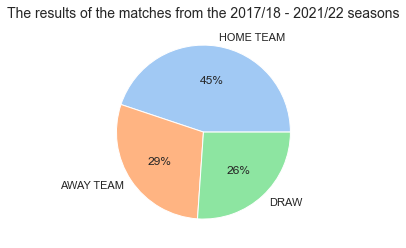

In [11]:
#create pie chart
labels = ['HOME TEAM', 'AWAY TEAM', 'DRAW']
data = [607,393,353]
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

plt.pie(data, labels = labels, colors = colors, autopct='%.000f%%')
plt.title('The results of the matches from the 2017/18 - 2021/22 seasons',fontsize = 14)
plt.show()

## ADDING AVERAGES OF STATISTICS

In [12]:
df_matches_all_new2.columns

Index(['Unnamed: 0', 'season', 'round', 'ekstraklasa', 'date', 'home_team',
       'away_team', 'result', 'goals_h', 'goals_a', 'odds_avg_h', 'odds_avg_d',
       'odds_avg_a', 'ht_match_points', 'at_match_points', 'ball_poss_h',
       'ball_poss_a', 'goal_attempts_h', 'goal_attempts_a', 'shots_on_h',
       'shots_on_a', 'shots_off_h', 'shots_off_a', 'corner_kicks_h',
       'corner_kicks_a', 'offsides_h', 'offsides_a', 'goalkeeper_saves_h',
       'goalkeeper_saves_a', 'fouls_h', 'fouls_a', 'attacks_h', 'attacks_a',
       'attacks_dang_h', 'attacks_dang_a', 'ht_rank', 'ht_ls_rank',
       'ht_days_ls_match', 'ht_points', 'ht_l_points', 'ht_l_wavg_points',
       'ht_goals', 'ht_l_goals', 'ht_l_wavg_goals', 'ht_goals_sf',
       'ht_l_goals_sf', 'ht_l_wavg_goals_sf', 'ht_wins', 'ht_draws',
       'ht_losses', 'ht_win_streak', 'ht_loss_streak', 'ht_draw_streak',
       'at_rank', 'at_ls_rank', 'at_days_ls_match', 'at_points', 'at_l_points',
       'at_l_wavg_points', 'at_goals', 'at_

In [13]:
df_matches_all_new2['ball_poss_hh_seas'] = -1 
df_matches_all_new2['ball_poss_aa_seas'] = -1
df_matches_all_new2['ball_poss_diff_seas'] = -1
df_matches_all_new2['goal_attempts_hh_seas'] = -1 
df_matches_all_new2['goal_attempts_aa_seas'] = -1
df_matches_all_new2['goal_attempts_diff_seas'] = -1
df_matches_all_new2['shots_on_hh_seas'] = -1
df_matches_all_new2['shots_on_aa_seas'] = -1
df_matches_all_new2['shots_on_diff_seas'] = -1
df_matches_all_new2['shots_off_hh_seas'] = -1 
df_matches_all_new2['shots_off_aa_seas'] = -1
df_matches_all_new2['shots_off_diff_seas'] = -1
df_matches_all_new2['corner_kicks_hh_seas'] = -1 
df_matches_all_new2['corner_kicks_aa_seas'] = -1
df_matches_all_new2['corner_kicks_diff_seas'] = -1
df_matches_all_new2['offsides_hh_seas'] = -1
df_matches_all_new2['offsides_aa_seas'] = -1
df_matches_all_new2['offsides_diff_seas'] = -1
df_matches_all_new2['goalkeeper_saves_hh_seas'] = -1 
df_matches_all_new2['goalkeeper_saves_aa_seas'] = -1
df_matches_all_new2['goalkeeper_saves_diff_seas'] = -1
df_matches_all_new2['fouls_hh_seas'] = -1
df_matches_all_new2['fouls_aa_seas'] = -1
df_matches_all_new2['fouls_diff_seas'] = -1
df_matches_all_new2['attacks_hh_seas'] = -1
df_matches_all_new2['attacks_aa_seas'] = -1
df_matches_all_new2['attacks_diff_seas'] = -1
df_matches_all_new2['attacks_dang_hh_seas'] = -1 
df_matches_all_new2['attacks_dang_aa_seas'] = -1
df_matches_all_new2['attacks_dang_diff_seas'] = -1

In [14]:
for index,row in df_matches_all_new2.iterrows():
    print(index)
    prev_matches_ht = df_matches_all_new2[(df_matches_all_new2.home_team == row['home_team']) & (df_matches_all_new2.date < row['date']) & (df_matches_all_new2.season == row['season'])]
    prev_matches_at = df_matches_all_new2[(df_matches_all_new2.away_team == row['away_team']) & (df_matches_all_new2.date < row['date']) & (df_matches_all_new2.season == row['season'])]
    n_ht = prev_matches_ht.shape[0]
    n_at = prev_matches_at.shape[0]
    if n_ht == 0:
        pass
    else:
        df_matches_all_new2.loc[index,'ball_poss_hh_seas'] = prev_matches_ht.ball_poss_h.mean()
        df_matches_all_new2.loc[index,'goal_attempts_hh_seas'] = prev_matches_ht.goal_attempts_h.mean()
        df_matches_all_new2.loc[index,'shots_on_hh_seas'] = prev_matches_ht.shots_on_h.mean()
        df_matches_all_new2.loc[index,'shots_off_hh_seas'] = prev_matches_ht.shots_off_h.mean()
        df_matches_all_new2.loc[index,'corner_kicks_hh_seas'] = prev_matches_ht.corner_kicks_h.mean()
        df_matches_all_new2.loc[index,'offsides_hh_seas'] = prev_matches_ht.offsides_h.mean()
        df_matches_all_new2.loc[index,'goalkeeper_saves_hh_seas'] = prev_matches_ht.goalkeeper_saves_h.mean()
        df_matches_all_new2.loc[index,'fouls_hh_seas'] = prev_matches_ht.fouls_h.mean()
        df_matches_all_new2.loc[index,'attacks_hh_seas'] = prev_matches_ht.attacks_h.mean()
        df_matches_all_new2.loc[index,'attacks_dang_hh_seas'] = prev_matches_ht.attacks_dang_h.mean()
        
    if n_at == 0:
        pass
    else:
        df_matches_all_new2.loc[index,'ball_poss_aa_seas'] = prev_matches_at.ball_poss_a.mean()
        df_matches_all_new2.loc[index,'goal_attempts_aa_seas'] = prev_matches_at.goal_attempts_a.mean()
        df_matches_all_new2.loc[index,'shots_on_aa_seas'] = prev_matches_at.shots_on_a.mean()
        df_matches_all_new2.loc[index,'shots_off_aa_seas'] = prev_matches_at.shots_off_a.mean()
        df_matches_all_new2.loc[index,'corner_kicks_aa_seas'] = prev_matches_at.corner_kicks_a.mean()
        df_matches_all_new2.loc[index,'offsides_aa_seas'] = prev_matches_at.offsides_a.mean()
        df_matches_all_new2.loc[index,'goalkeeper_saves_aa_seas'] = prev_matches_at.goalkeeper_saves_a.mean()
        df_matches_all_new2.loc[index,'fouls_aa_seas'] = prev_matches_at.fouls_a.mean()
        df_matches_all_new2.loc[index,'attacks_aa_seas'] = prev_matches_at.attacks_a.mean()
        df_matches_all_new2.loc[index,'attacks_dang_aa_seas'] = prev_matches_at.attacks_dang_a.mean()
        
    df_matches_all_new2.loc[index,'ball_poss_diff_seas'] = df_matches_all_new2.loc[index]['ball_poss_hh_seas'] - df_matches_all_new2.loc[index]['ball_poss_aa_seas']
    df_matches_all_new2.loc[index,'goal_attempts_diff_seas'] = df_matches_all_new2.loc[index]['goal_attempts_hh_seas'] - df_matches_all_new2.loc[index]['goal_attempts_aa_seas']
    df_matches_all_new2.loc[index,'shots_on_diff_seas'] = df_matches_all_new2.loc[index]['shots_on_hh_seas'] - df_matches_all_new2.loc[index]['shots_on_aa_seas']
    df_matches_all_new2.loc[index,'shots_off_diff_seas'] = df_matches_all_new2.loc[index]['shots_off_hh_seas'] - df_matches_all_new2.loc[index]['shots_off_aa_seas']
    df_matches_all_new2.loc[index,'corner_kicks_diff_seas'] = df_matches_all_new2.loc[index]['corner_kicks_hh_seas'] - df_matches_all_new2.loc[index]['corner_kicks_aa_seas']
    df_matches_all_new2.loc[index,'offsides_diff_seas'] = df_matches_all_new2.loc[index]['offsides_hh_seas'] - df_matches_all_new2.loc[index]['offsides_aa_seas']
    df_matches_all_new2.loc[index,'goalkeeper_saves_diff_seas'] = df_matches_all_new2.loc[index]['goalkeeper_saves_hh_seas'] - df_matches_all_new2.loc[index]['goalkeeper_saves_aa_seas']
    df_matches_all_new2.loc[index,'fouls_diff_seas'] = df_matches_all_new2.loc[index]['fouls_hh_seas'] - df_matches_all_new2.loc[index]['fouls_aa_seas']
    df_matches_all_new2.loc[index,'attacks_diff_seas'] = df_matches_all_new2.loc[index]['attacks_hh_seas'] - df_matches_all_new2.loc[index]['attacks_aa_seas']
    df_matches_all_new2.loc[index,'attacks_dang_diff_seas'] = df_matches_all_new2.loc[index]['attacks_dang_hh_seas'] - df_matches_all_new2.loc[index]['attacks_dang_aa_seas']
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
df_fe2 = df_matches_all_new2.copy()
df_fe2

,Unnamed: 0,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,...,goalkeeper_saves_diff_seas,fouls_hh_seas,fouls_aa_seas,fouls_diff_seas,attacks_hh_seas,attacks_aa_seas,attacks_diff_seas,attacks_dang_hh_seas,attacks_dang_aa_seas,attacks_dang_diff_seas
0,690,17/18,1.0,1.0,2017-07-14,Wisła Płock,Lechia Gdańsk,A,0,2,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
1,691,17/18,1.0,1.0,2017-07-14,Pogoń Szczecin,Wisła Kraków,A,1,2,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
2,692,17/18,1.0,1.0,2017-07-15,Górnik Zabrze,Legia Warszawa,H,3,1,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
3,693,17/18,1.0,1.0,2017-07-15,Cracovia,Piast Gliwice,D,1,1,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
4,694,17/18,1.0,1.0,2017-07-16,Lech Poznań,Sandecja Nowy Sącz,D,0,0,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,...,-2.250000,16.250000,16.083333,0.166667,106.833333,92.583333,14.250000,67.666667,58.500000,9.166667
1349,2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,...,-0.909091,12.636364,11.666667,0.969697,106.727273,90.500000,16.227273,81.818182,60.666667,21.151515
1350,2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,...,2.431818,13.363636,13.166667,0.196970,92.727273,98.166667,-5.439394,76.727273,70.583333,6.143939
1351,2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,...,-0.818182,14.090909,12.272727,1.818182,95.818182,80.181818,15.636364,77.181818,51.636364,25.545455


In [16]:
num_cols = df_fe2.dtypes[df_fe2.dtypes != 'object'].index.tolist()

cols_to_drop = ['season', 'round','ekstraklasa','date', 'home_team', 'away_team', 'goals_h', 'goals_a',
                'ht_match_points', 'at_match_points','ls_winner','proba','winner_h','winner_a','winner_d',
               'ball_poss_h','ball_poss_a','goal_attempts_h','goal_attempts_a','shots_on_h','shots_on_a','shots_off_h','shots_off_a',
           'corner_kicks_h','corner_kicks_a','offsides_h','offsides_a','goalkeeper_saves_h','goalkeeper_saves_a','fouls_h',
           'fouls_a','attacks_h','attacks_a','attacks_dang_h','attacks_dang_a']

corr_cols = list(set(num_cols) - set(cols_to_drop))

df_fe2['winner_h'] = np.where(df_fe2.result == 'H', 1, 0)
df_fe2['winner_a'] = np.where(df_fe2.result == 'A', 1, 0)
df_fe2['winner_d'] = np.where(df_fe2.result == 'D', 1, 0)

In [17]:
df_fe2

,Unnamed: 0,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,...,fouls_diff_seas,attacks_hh_seas,attacks_aa_seas,attacks_diff_seas,attacks_dang_hh_seas,attacks_dang_aa_seas,attacks_dang_diff_seas,winner_h,winner_a,winner_d
0,690,17/18,1.0,1.0,2017-07-14,Wisła Płock,Lechia Gdańsk,A,0,2,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,1,0
1,691,17/18,1.0,1.0,2017-07-14,Pogoń Szczecin,Wisła Kraków,A,1,2,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,1,0
2,692,17/18,1.0,1.0,2017-07-15,Górnik Zabrze,Legia Warszawa,H,3,1,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,1,0,0
3,693,17/18,1.0,1.0,2017-07-15,Cracovia,Piast Gliwice,D,1,1,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,0,1
4,694,17/18,1.0,1.0,2017-07-16,Lech Poznań,Sandecja Nowy Sącz,D,0,0,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,...,0.166667,106.833333,92.583333,14.250000,67.666667,58.500000,9.166667,0,1,0
1349,2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,...,0.969697,106.727273,90.500000,16.227273,81.818182,60.666667,21.151515,0,0,1
1350,2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,...,0.196970,92.727273,98.166667,-5.439394,76.727273,70.583333,6.143939,0,0,1
1351,2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,...,1.818182,95.818182,80.181818,15.636364,77.181818,51.636364,25.545455,1,0,0


In [18]:
hw_corr = df_fe2[corr_cols + ['winner_h']].corr()['winner_h'].sort_values(ascending = False).reset_index()
hw_corr[np.abs(hw_corr.winner_h) >= 0.05].reset_index(drop=True)['index']

0                     winner_h
1                   odds_avg_a
2                   odds_avg_d
3                      at_rank
4         corner_kicks_hh_seas
5                fouls_aa_seas
6             shots_on_hh_seas
7        goal_attempts_hh_seas
8                at_l_goals_sf
9            shots_off_hh_seas
10        attacks_dang_hh_seas
11           ball_poss_hh_seas
12      corner_kicks_diff_seas
13             ht_l_wavg_goals
14             attacks_hh_seas
15    goalkeeper_saves_aa_seas
16              at_draw_streak
17          shots_on_diff_seas
18     goal_attempts_diff_seas
19          at_l_wavg_goals_sf
20                  ht_l_goals
21             attacks_aa_seas
22            ht_l_wavg_points
23               ht_l_goals_sf
24                 at_l_points
25          ht_l_wavg_goals_sf
26                     ht_rank
27            at_days_ls_match
28             fouls_diff_seas
29                  odds_avg_h
Name: index, dtype: object

In [19]:
aw_corr = df_fe2[corr_cols + ['winner_a']].corr()['winner_a'].sort_values(ascending = False).reset_index()
aw_corr[np.abs(aw_corr.winner_a) >= 0.05].reset_index(drop=True)['index']

0                     winner_a
1                   odds_avg_h
2                   at_l_goals
3               ht_draw_streak
4             at_days_ls_match
5                      at_wins
6                      ht_rank
7                    at_points
8     goalkeeper_saves_aa_seas
9         corner_kicks_hh_seas
10            shots_on_hh_seas
11      corner_kicks_diff_seas
12               fouls_aa_seas
13           shots_off_hh_seas
14         shots_off_diff_seas
15          at_l_wavg_goals_sf
16       goal_attempts_hh_seas
17     goal_attempts_diff_seas
18                     at_rank
19               at_l_goals_sf
20                  odds_avg_d
21                  odds_avg_a
Name: index, dtype: object

In [20]:
d_corr = df_fe2[corr_cols + ['winner_d']].corr()['winner_d'].sort_values(ascending = False).reset_index()
d_corr[np.abs(d_corr.winner_d) >= 0.05].reset_index(drop=True)['index']

0                winner_d
1        ht_days_ls_match
2    attacks_dang_aa_seas
3         ht_l_wavg_goals
4          at_draw_streak
5              at_l_goals
6              odds_avg_a
Name: index, dtype: object

In [21]:
to_corr = set(list(hw_corr[np.abs(hw_corr.winner_h) >= 0.05].reset_index(drop=True)['index'])+list(aw_corr[np.abs(aw_corr.winner_a) >= 0.05].reset_index(drop=True)['index'])+list(d_corr[np.abs(d_corr.winner_d) >= 0.05].reset_index(drop=True)['index']))
to_corr.remove('winner_h')
to_corr.remove('winner_a')
to_corr.remove('winner_d')
len(to_corr)

36

In [361]:
df

,goal_attempts_hh_seas,at_wins,shots_on_hh_seas,at_l_goals_sf,shots_on_diff_seas,odds_avg_d,attacks_hh_seas,at_points,at_l_points,ball_poss_hh_seas,...,ht_rank,at_days_ls_match,at_draw_streak,corner_kicks_hh_seas,shots_off_hh_seas,fouls_diff_seas,shots_off_diff_seas,attacks_aa_seas,attacks_dang_hh_seas,odds_avg_h
690,-1.000000,0,-1.000000,0.666667,0.000000,3.150,-1.000000,0,0.000000,-1.000000,...,1,40,0,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,3.550
691,-1.000000,0,-1.000000,1.000000,0.000000,3.150,-1.000000,0,0.000000,-1.000000,...,2,40,0,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,2.400
692,-1.000000,0,-1.000000,0.666667,0.000000,3.800,-1.000000,0,0.000000,-1.000000,...,5,41,0,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,4.750
693,-1.000000,0,-1.000000,1.666667,0.000000,3.300,-1.000000,0,0.000000,-1.000000,...,6,43,0,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,2.200
694,-1.000000,0,-1.000000,1.000000,0.000000,4.450,-1.000000,0,0.000000,-1.000000,...,8,42,0,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,1.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,12.166667,10,4.416667,1.000000,0.833333,3.325,106.833333,33,1.000000,49.333333,...,11,7,0,4.416667,7.750000,0.166667,0.500000,92.583333,67.666667,2.185
2039,14.000000,10,3.818182,1.333333,-0.431818,3.210,106.727273,39,1.000000,52.000000,...,15,9,0,4.818182,10.181818,0.969697,2.598485,90.500000,81.818182,2.355
2040,12.090909,14,3.909091,0.666667,-2.840909,4.350,92.727273,48,1.000000,56.090909,...,17,7,0,6.363636,8.181818,0.196970,-2.484848,98.166667,76.727273,6.450
2041,15.181818,8,6.909091,1.666667,3.636364,5.075,95.818182,32,0.333333,52.181818,...,3,10,1,4.818182,8.272727,1.818182,2.363636,80.181818,77.181818,1.330


In [381]:
correlation[np.abs(correlation) <0.7] = 0

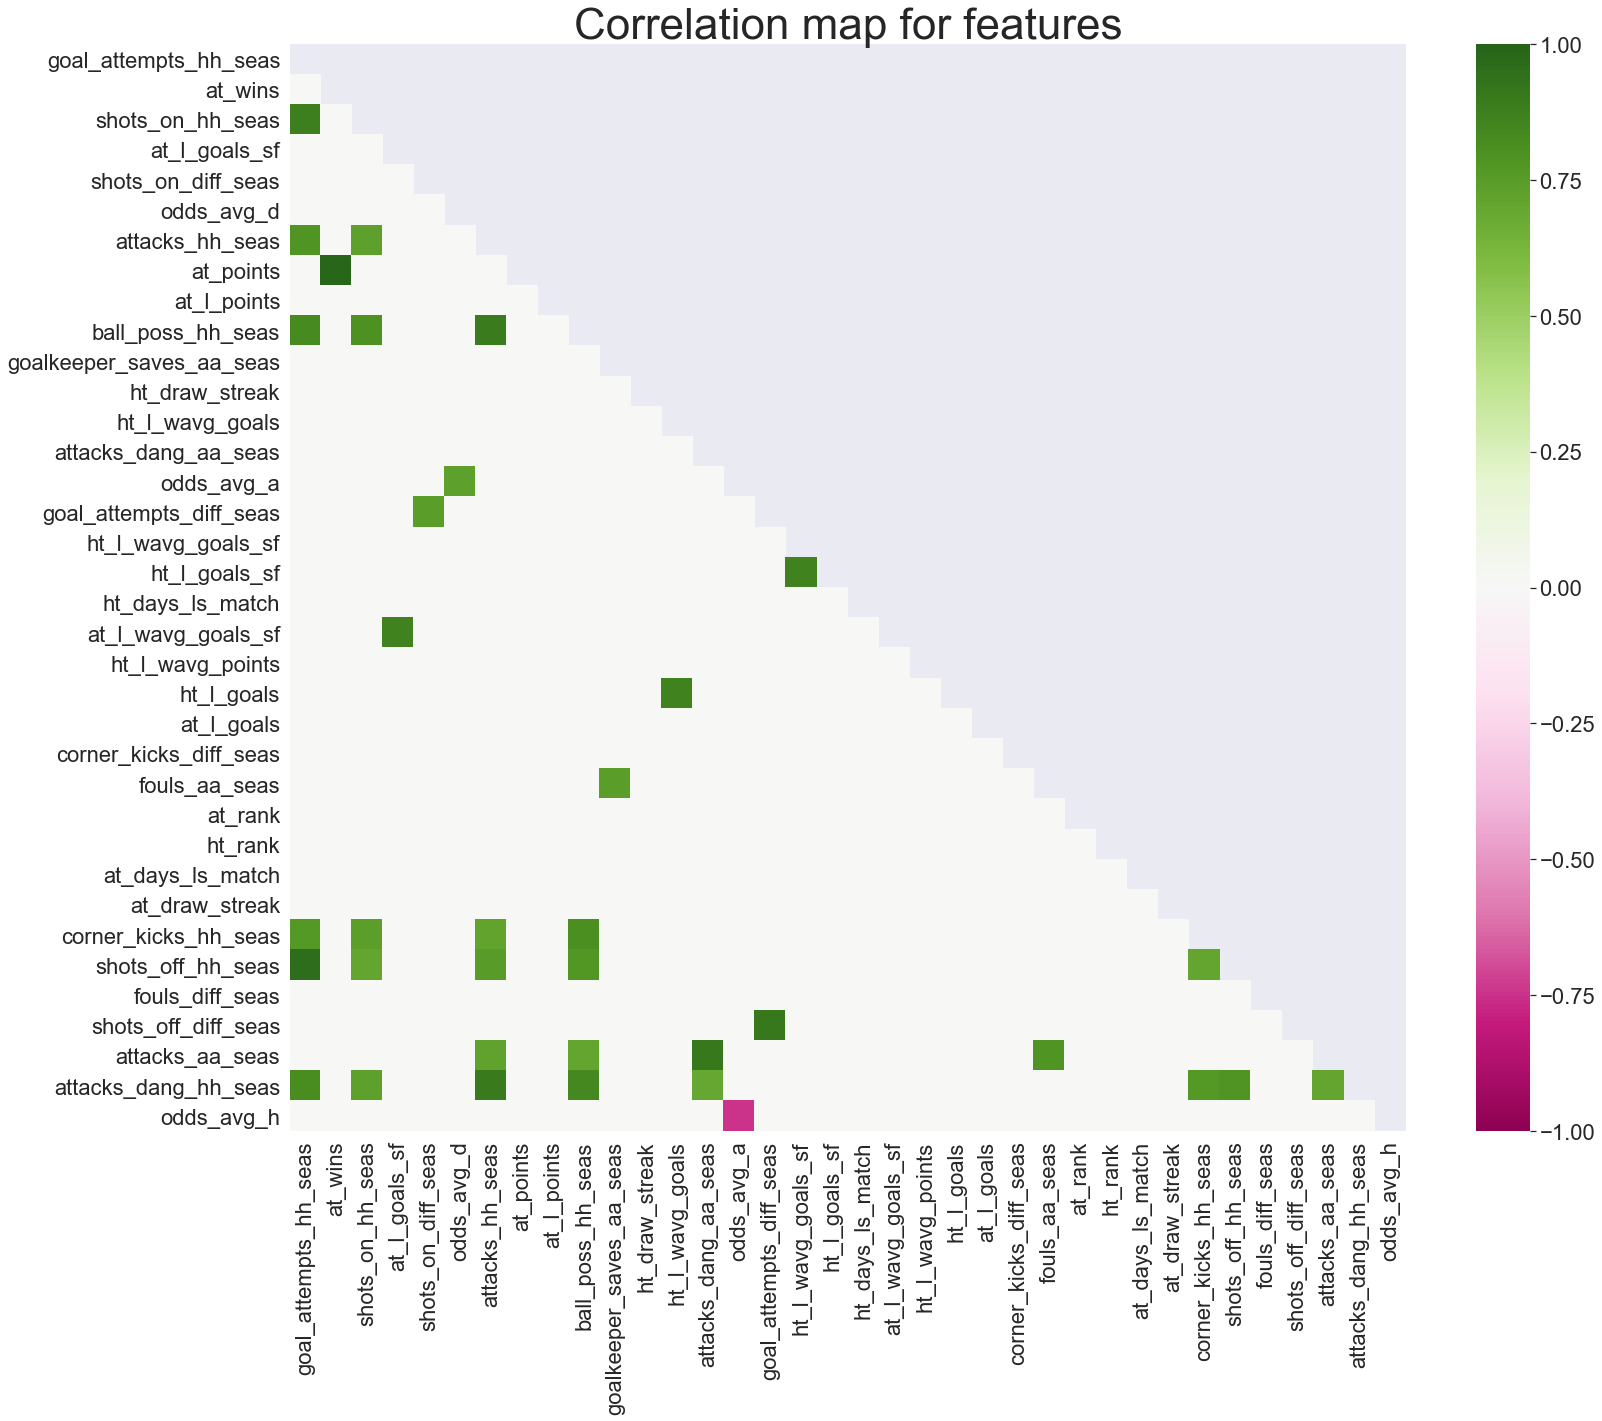

In [389]:
mask = np.triu(np.ones_like(correlation))
sns.set(font_scale = 2)
#correlation = df.corr()
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(correlation,vmin=-1,vmax=1,cmap="PiYG", mask=mask)
ax.yaxis.label.set_size(30)
plt.title('Correlation map for features',fontsize=44)
plt.show()

## MODELS

In [23]:
import pandas as pd
import numpy as np
import time
import os
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold

In [24]:
df = df_fe2.copy()

In [25]:
df

,Unnamed: 0,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,...,fouls_diff_seas,attacks_hh_seas,attacks_aa_seas,attacks_diff_seas,attacks_dang_hh_seas,attacks_dang_aa_seas,attacks_dang_diff_seas,winner_h,winner_a,winner_d
0,690,17/18,1.0,1.0,2017-07-14,Wisła Płock,Lechia Gdańsk,A,0,2,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,1,0
1,691,17/18,1.0,1.0,2017-07-14,Pogoń Szczecin,Wisła Kraków,A,1,2,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,1,0
2,692,17/18,1.0,1.0,2017-07-15,Górnik Zabrze,Legia Warszawa,H,3,1,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,1,0,0
3,693,17/18,1.0,1.0,2017-07-15,Cracovia,Piast Gliwice,D,1,1,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,0,1
4,694,17/18,1.0,1.0,2017-07-16,Lech Poznań,Sandecja Nowy Sącz,D,0,0,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,...,0.166667,106.833333,92.583333,14.250000,67.666667,58.500000,9.166667,0,1,0
1349,2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,...,0.969697,106.727273,90.500000,16.227273,81.818182,60.666667,21.151515,0,0,1
1350,2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,...,0.196970,92.727273,98.166667,-5.439394,76.727273,70.583333,6.143939,0,0,1
1351,2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,...,1.818182,95.818182,80.181818,15.636364,77.181818,51.636364,25.545455,1,0,0


In [26]:
#dropping columns one wouldn't have before an actual match
#cols_to_drop = ['season','ekstraklasa', 'round','date', 'home_team', 'away_team', 'goals_h', 'goals_a','ht_match_points', 'at_match_points','winner_h','winner_a','winner_d','proba']
cols_to_drop = ['season', 'round','ekstraklasa','date', 'home_team', 'away_team', 'goals_h', 'goals_a',
                'ht_match_points', 'at_match_points','ls_winner','winner_h','winner_a','winner_d',
               'ball_poss_h','ball_poss_a','goal_attempts_h','goal_attempts_a','shots_on_h','shots_on_a','shots_off_h','shots_off_a',
               'corner_kicks_h','corner_kicks_a','offsides_h','offsides_a','goalkeeper_saves_h','goalkeeper_saves_a','fouls_h',
               'fouls_a','attacks_h','attacks_a','attacks_dang_h','attacks_dang_a']

df.drop( columns = cols_to_drop, inplace = True)

df = df.rename(columns = {'result':'winner'})

#turning the target variable into integers { H:2 , A:1 , D:0 }
df['winner'] = np.where(df.winner == 'H', 2, np.where(df.winner == 'A', 0, 1))

In [34]:
df

,Unnamed: 0,winner,odds_avg_h,odds_avg_d,odds_avg_a,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,...,goalkeeper_saves_diff_seas,fouls_hh_seas,fouls_aa_seas,fouls_diff_seas,attacks_hh_seas,attacks_aa_seas,attacks_diff_seas,attacks_dang_hh_seas,attacks_dang_aa_seas,attacks_dang_diff_seas
0,690,0,3.550,3.150,2.100,1,7,42,0,0.000000,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
1,691,0,2.400,3.150,2.950,2,11,40,0,0.000000,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
2,692,2,4.750,3.800,1.660,5,-1,41,0,0.000000,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
3,693,1,2.200,3.300,3.150,6,13,43,0,0.000000,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
4,694,1,1.400,4.450,7.700,8,3,42,0,0.000000,...,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,0,2.185,3.325,3.550,11,13,9,30,1.000000,...,-2.250000,16.250000,16.083333,0.166667,106.833333,92.583333,14.250000,67.666667,58.500000,9.166667
1349,2039,1,2.355,3.210,3.275,15,8,6,26,0.333333,...,-0.909091,12.636364,11.666667,0.969697,106.727273,90.500000,16.227273,81.818182,60.666667,21.151515
1350,2040,1,6.450,4.350,1.525,17,14,8,23,0.666667,...,2.431818,13.363636,13.166667,0.196970,92.727273,98.166667,-5.439394,76.727273,70.583333,6.143939
1351,2041,2,1.330,5.075,11.125,3,2,8,48,2.333333,...,-0.818182,14.090909,12.272727,1.818182,95.818182,80.181818,15.636364,77.181818,51.636364,25.545455


Text(0.5, 1.0, 'Number of given result depending on the difference in the table')

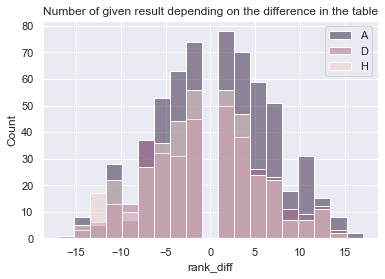

In [39]:
sns.histplot(data=df, x='rank_diff', hue='winner')
plt.legend(['A','D','H'])
plt.title('Number of given result depending on the difference in the table')

In [36]:
df['rank_diff'] = df.apply(lambda x: x.at_rank-x.ht_rank,axis=1)

In [37]:
df.rank_diff

0       12.0
1        7.0
2        7.0
3        7.0
4        4.0
        ... 
1348    -3.0
1349   -10.0
1350   -14.0
1351     6.0
1352     5.0
Name: rank_diff, Length: 1353, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1353 non-null   int64  
 1   winner                      1353 non-null   int32  
 2   odds_avg_h                  1353 non-null   float64
 3   odds_avg_d                  1353 non-null   float64
 4   odds_avg_a                  1353 non-null   float64
 5   ht_rank                     1353 non-null   int64  
 6   ht_ls_rank                  1353 non-null   int64  
 7   ht_days_ls_match            1353 non-null   int64  
 8   ht_points                   1353 non-null   int64  
 9   ht_l_points                 1353 non-null   float64
 10  ht_l_wavg_points            1353 non-null   float64
 11  ht_goals                    1353 non-null   int64  
 12  ht_l_goals                  1353 non-null   float64
 13  ht_l_wavg_goals             1353 

In [114]:
df.to_csv('df.csv')

In [41]:
#turning categorical into dummy vars
df_dum = pd.get_dummies(df)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1353 non-null   int64  
 1   winner                      1353 non-null   int32  
 2   odds_avg_h                  1353 non-null   float64
 3   odds_avg_d                  1353 non-null   float64
 4   odds_avg_a                  1353 non-null   float64
 5   ht_rank                     1353 non-null   int64  
 6   ht_ls_rank                  1353 non-null   int64  
 7   ht_days_ls_match            1353 non-null   int64  
 8   ht_points                   1353 non-null   int64  
 9   ht_l_points                 1353 non-null   float64
 10  ht_l_wavg_points            1353 non-null   float64
 11  ht_goals                    1353 non-null   int64  
 12  ht_l_goals                  1353 non-null   float64
 13  ht_l_wavg_goals             1353 

In [273]:
X_train.columns

Index(['odds_avg_h', 'odds_avg_d', 'odds_avg_a', 'ball_poss_h', 'ball_poss_a',
       'goal_attempts_h', 'goal_attempts_a', 'shots_on_h', 'shots_on_a',
       'shots_off_h', 'shots_off_a', 'corner_kicks_h', 'corner_kicks_a',
       'offsides_h', 'offsides_a', 'goalkeeper_saves_h', 'goalkeeper_saves_a',
       'fouls_h', 'fouls_a', 'attacks_h', 'attacks_a', 'attacks_dang_h',
       'attacks_dang_a', 'ht_rank', 'ht_ls_rank', 'ht_days_ls_match',
       'ht_points', 'ht_l_points', 'ht_l_wavg_points', 'ht_goals',
       'ht_l_goals', 'ht_l_wavg_goals', 'ht_goals_sf', 'ht_l_goals_sf',
       'ht_l_wavg_goals_sf', 'ht_wins', 'ht_draws', 'ht_losses',
       'ht_win_streak', 'ht_loss_streak', 'ht_draw_streak', 'at_rank',
       'at_ls_rank', 'at_days_ls_match', 'at_points', 'at_l_points',
       'at_l_wavg_points', 'at_goals', 'at_l_goals', 'at_l_wavg_goals',
       'at_goals_sf', 'at_l_goals_sf', 'at_l_wavg_goals_sf', 'at_wins',
       'at_draws', 'at_losses', 'at_win_streak', 'at_loss_streak'

In [419]:
len(X_test)

271

In [275]:
pred_log1

array([0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2,
       2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2,
       2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0,
       2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1,
       0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2,
       0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 1, 2, 0, 2, 0])

In [44]:
X

,Unnamed: 0,odds_avg_h,odds_avg_d,odds_avg_a,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,...,fouls_hh_seas,fouls_aa_seas,fouls_diff_seas,attacks_hh_seas,attacks_aa_seas,attacks_diff_seas,attacks_dang_hh_seas,attacks_dang_aa_seas,attacks_dang_diff_seas,rank_diff
0,690,3.550,3.150,2.100,1,7,42,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,12.0
1,691,2.400,3.150,2.950,2,11,40,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,7.0
2,692,4.750,3.800,1.660,5,-1,41,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,7.0
3,693,2.200,3.300,3.150,6,13,43,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,7.0
4,694,1.400,4.450,7.700,8,3,42,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,2.185,3.325,3.550,11,13,9,30,1.000000,0.984888,...,16.250000,16.083333,0.166667,106.833333,92.583333,14.250000,67.666667,58.500000,9.166667,-3.0
1349,2039,2.355,3.210,3.275,15,8,6,26,0.333333,0.659111,...,12.636364,11.666667,0.969697,106.727273,90.500000,16.227273,81.818182,60.666667,21.151515,-10.0
1350,2040,6.450,4.350,1.525,17,14,8,23,0.666667,0.662889,...,13.363636,13.166667,0.196970,92.727273,98.166667,-5.439394,76.727273,70.583333,6.143939,-14.0
1351,2041,1.330,5.075,11.125,3,2,8,48,2.333333,1.498111,...,14.090909,12.272727,1.818182,95.818182,80.181818,15.636364,77.181818,51.636364,25.545455,6.0


In [43]:
#creating the final set 
X = df_dum.drop(columns = ['winner'], axis = 1)
y = df_dum.winner.values

np.random.seed(101)
#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#scaling features
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#creating models variable to iterate through each model and print result

models = [LogisticRegression(max_iter= 1000, multi_class = 'multinomial'), tree.DecisionTreeClassifier(),
RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), svm.SVC(kernel='rbf'), MLPClassifier()]

names = ['Logistic Regression','Decision Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM', 'NN']

#loop through each model and print train score and elapsed time
for model, name in zip(models, names):
    start = time.time()
    scores = cross_val_score(model, X_train, y_train ,scoring= 'accuracy', cv=10)
    print(name, ":", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), " - Elapsed time: ", time.time() - start)

Logistic Regression : 0.438, +- 0.032  - Elapsed time:  1.545865535736084
Decision Tree : 0.348, +- 0.057  - Elapsed time:  0.5904216766357422
Random Forest : 0.427, +- 0.023  - Elapsed time:  5.140292406082153
Gradient Boost : 0.421, +- 0.035  - Elapsed time:  35.94044208526611
KNN : 0.384, +- 0.068  - Elapsed time:  0.34572315216064453
SVM : 0.468, +- 0.018  - Elapsed time:  1.469067096710205


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

NN : 0.416, +- 0.034  - Elapsed time:  18.14332103729248


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [115]:
#Creating loop to test which set of features is the best one for Logistic Regression

acc_results = []
n_features = []

#best classifier on training data
clf = LogisticRegression(max_iter = 3000, multi_class = 'multinomial')

for i in range(2,70):
    rfe = RFE(estimator = clf, n_features_to_select = i, step=1)
    rfe.fit(X, y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y, test_size = 0.2)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.470, +- 0.019 N_features : 2


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.473, +- 0.017 N_features : 3


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.467, +- 0.019 N_features : 4


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.465, +- 0.013 N_features : 5


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.469, +- 0.018 N_features : 6


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.469, +- 0.018 N_features : 7


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.468, +- 0.015 N_features : 8


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.469, +- 0.016 N_features : 9


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.460, +- 0.020 N_features : 10


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.462, +- 0.027 N_features : 11


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.471, +- 0.030 N_features : 12


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.471, +- 0.025 N_features : 13


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.472, +- 0.024 N_features : 14


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.475, +- 0.024 N_features : 15


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.478, +- 0.021 N_features : 16


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.470, +- 0.019 N_features : 17


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.463, +- 0.020 N_features : 18


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.462, +- 0.013 N_features : 19


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.469, +- 0.021 N_features : 20


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.466, +- 0.025 N_features : 21


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.469, +- 0.022 N_features : 22


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.471, +- 0.022 N_features : 23


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.470, +- 0.025 N_features : 24


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.469, +- 0.023 N_features : 25


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.465, +- 0.028 N_features : 26


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.465, +- 0.029 N_features : 27


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.462, +- 0.030 N_features : 28


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.457, +- 0.023 N_features : 29


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.457, +- 0.020 N_features : 30


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.458, +- 0.022 N_features : 31


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.462, +- 0.024 N_features : 32


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.464, +- 0.024 N_features : 33


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.462, +- 0.023 N_features : 34


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.464, +- 0.032 N_features : 35


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.463, +- 0.026 N_features : 36


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.460, +- 0.027 N_features : 37


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.461, +- 0.027 N_features : 38


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.453, +- 0.029 N_features : 39


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.456, +- 0.031 N_features : 40


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.450, +- 0.028 N_features : 41


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.456, +- 0.027 N_features : 42


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.446, +- 0.023 N_features : 43


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.448, +- 0.018 N_features : 44


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.450, +- 0.020 N_features : 45


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.447, +- 0.020 N_features : 46


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.448, +- 0.020 N_features : 47


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.446, +- 0.024 N_features : 48


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.447, +- 0.024 N_features : 49


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.447, +- 0.025 N_features : 50


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.444, +- 0.028 N_features : 51


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.440, +- 0.024 N_features : 52


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.445, +- 0.027 N_features : 53


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.445, +- 0.027 N_features : 54


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.445, +- 0.024 N_features : 55


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.446, +- 0.025 N_features : 56


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.446, +- 0.028 N_features : 57


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.445, +- 0.030 N_features : 58


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.450, +- 0.028 N_features : 59


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.446, +- 0.028 N_features : 60


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.445, +- 0.030 N_features : 61


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.445, +- 0.028 N_features : 62


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.444, +- 0.027 N_features : 63


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.441, +- 0.028 N_features : 64


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.442, +- 0.029 N_features : 65


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.441, +- 0.033 N_features : 66


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.440, +- 0.026 N_features : 67


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.440, +- 0.026 N_features : 68


C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

 Clf result : 0.441, +- 0.026 N_features : 69


In [46]:
featured_columns = ['odds_avg_h',
'ht_l_wavg_goals',
'ht_draw_streak',
'at_l_points',
'at_l_wavg_points',
'at_l_goals',
'at_l_goals_sf',
'at_l_wavg_goals_sf',
'at_win_streak',
'goal_attempts_diff_seas',
'goal_attempts_hh_seas',
' at_draw_streak',
'shots_on_hh_seas',
'shots_on_diff_seas',
'shots_off_hh_seas',
'shots_off_diff_seas']

In [47]:
featured_columns

['odds_avg_h',
 'ht_l_wavg_goals',
 'ht_draw_streak',
 'at_l_points',
 'at_l_wavg_points',
 'at_l_goals',
 'at_l_goals_sf',
 'at_l_wavg_goals_sf',
 'at_win_streak',
 'goal_attempts_diff_seas',
 'goal_attempts_hh_seas',
 ' at_draw_streak',
 'shots_on_hh_seas',
 'shots_on_diff_seas',
 'shots_off_hh_seas',
 'shots_off_diff_seas']

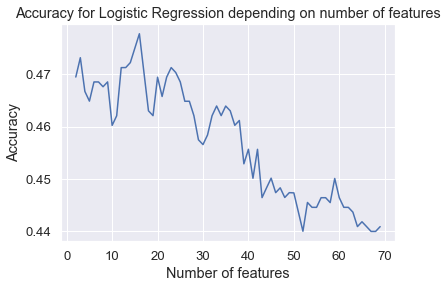

In [118]:
plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title('Accuracy for Logistic Regression depending on number of features')
sns.set(font_scale = 1.2)
plt.show()

In [48]:
clf = LogisticRegression(max_iter = 3000, multi_class = 'multinomial')

In [49]:
#getting the best 13 features from RFE
rfe = RFE(estimator = clf, n_features_to_select = 16, step=1)
rfe.fit(X, y)
X_transformed = rfe.transform(X)

np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, test_size = 0.2)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [50]:
#getting column names
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

#column importances for each class
importances_a = pd.DataFrame(np.exp(rfe.estimator_.coef_[0]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

importances_d = pd.DataFrame(np.exp(rfe.estimator_.coef_[1]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

importances_h = pd.DataFrame(np.exp(rfe.estimator_.coef_[2]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

importances_h


,coef
at_l_goals_sf,1.361737
ht_l_wavg_goals,1.269956
at_draw_streak,1.170834
at_win_streak,1.169405
at_l_wavg_points,1.135035
shots_off_diff_seas,1.124935
shots_on_diff_seas,1.122191
at_l_goals,1.051554
shots_off_hh_seas,1.019678
goal_attempts_hh_seas,1.015401


In [51]:
featured_columns

['odds_avg_h',
 'ht_l_wavg_goals',
 'ht_draw_streak',
 'at_l_points',
 'at_l_wavg_points',
 'at_l_goals',
 'at_l_goals_sf',
 'at_l_wavg_goals_sf',
 'at_win_streak',
 'at_draw_streak',
 'goal_attempts_hh_seas',
 'goal_attempts_diff_seas',
 'shots_on_hh_seas',
 'shots_on_diff_seas',
 'shots_off_hh_seas',
 'shots_off_diff_seas']

In [253]:
featured_columns

['odds_avg_h',
 'ht_l_wavg_goals',
 'ht_draw_streak',
 'at_l_points',
 'at_l_wavg_points',
 'at_l_goals',
 'at_l_goals_sf',
 'at_l_wavg_goals_sf',
 'at_win_streak',
 'at_draw_streak',
 'goal_attempts_hh_seas',
 'goal_attempts_diff_seas',
 'shots_on_hh_seas',
 'shots_on_diff_seas',
 'shots_off_hh_seas',
 'shots_off_diff_seas']

In [429]:
featured_columns

['odds_avg_h',
 'ht_l_wavg_goals',
 'ht_draw_streak',
 'at_l_points',
 'at_l_wavg_points',
 'at_l_goals',
 'at_l_goals_sf',
 'at_l_wavg_goals_sf',
 'at_win_streak',
 'at_draw_streak',
 'goal_attempts_hh_seas',
 'goal_attempts_diff_seas',
 'shots_on_hh_seas',
 'shots_on_diff_seas',
 'shots_off_hh_seas',
 'shots_off_diff_seas']

In [426]:
importances_a

,coef
at_l_wavg_goals_sf,1.471150
at_l_points,1.197093
shots_on_hh_seas,1.170290
shots_off_hh_seas,1.168191
odds_avg_h,1.095183
shots_off_diff_seas,1.062561
shots_on_diff_seas,1.011605
goal_attempts_diff_seas,0.978990
at_win_streak,0.918145
ht_draw_streak,0.912829


In [427]:
importances_d

,coef
odds_avg_h,1.328837
goal_attempts_hh_seas,1.182982
goal_attempts_diff_seas,1.178473
ht_draw_streak,1.154682
at_l_goals,1.150902
at_l_wavg_goals_sf,1.096698
at_l_points,1.064778
ht_l_wavg_goals,1.034969
at_l_wavg_points,1.006205
at_draw_streak,1.004495


In [442]:

featured_columns

['odds_avg_h',
 'ht_l_wavg_goals',
 'ht_draw_streak',
 'at_l_points',
 'at_l_wavg_points',
 'at_l_goals',
 'at_l_goals_sf',
 'at_l_wavg_goals_sf',
 'at_win_streak',
 'at_draw_streak',
 'goal_attempts_hh_seas',
 'goal_attempts_diff_seas',
 'shots_on_hh_seas',
 'shots_on_diff_seas',
 'shots_off_hh_seas',
 'shots_off_diff_seas']

In [52]:
X[featured_columns]

,odds_avg_h,ht_l_wavg_goals,ht_draw_streak,at_l_points,at_l_wavg_points,at_l_goals,at_l_goals_sf,at_l_wavg_goals_sf,at_win_streak,at_draw_streak,goal_attempts_hh_seas,goal_attempts_diff_seas,shots_on_hh_seas,shots_on_diff_seas,shots_off_hh_seas,shots_off_diff_seas
0,3.550,1.166667,0,0.000000,0.000000,1.333333,0.666667,0.333333,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
1,2.400,1.416667,0,0.000000,0.000000,1.333333,1.000000,0.666667,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
2,4.750,1.375000,0,0.000000,0.000000,2.666667,0.666667,0.666667,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
3,2.200,1.020833,0,0.000000,0.000000,1.666667,1.666667,1.166667,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
4,1.400,0.677083,0,0.000000,0.000000,0.666667,1.000000,1.083333,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2.185,0.665909,3,1.000000,1.376497,1.333333,1.000000,1.061146,1,0,12.166667,1.333333,4.416667,0.833333,7.750000,0.500000
1349,2.355,0.332955,0,1.000000,1.188248,0.666667,1.333333,1.197240,0,0,14.000000,2.166667,3.818182,-0.431818,10.181818,2.598485
1350,6.450,0.666477,1,1.000000,1.094124,1.333333,0.666667,0.931953,0,0,12.090909,-5.325758,3.909091,-2.840909,8.181818,-2.484848
1351,1.330,1.166572,0,0.333333,0.713729,0.666667,1.666667,1.299310,0,1,15.181818,6.000000,6.909091,3.636364,8.272727,2.363636


In [443]:
X[featured_columns]

,odds_avg_h,ht_l_wavg_goals,ht_draw_streak,at_l_points,at_l_wavg_points,at_l_goals,at_l_goals_sf,at_l_wavg_goals_sf,at_win_streak,at_draw_streak,goal_attempts_hh_seas,goal_attempts_diff_seas,shots_on_hh_seas,shots_on_diff_seas,shots_off_hh_seas,shots_off_diff_seas
690,3.550,1.166667,0,0.000000,0.000000,1.333333,0.666667,0.333333,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
691,2.400,1.416667,0,0.000000,0.000000,1.333333,1.000000,0.666667,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
692,4.750,1.375000,0,0.000000,0.000000,2.666667,0.666667,0.666667,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
693,2.200,1.020833,0,0.000000,0.000000,1.666667,1.666667,1.166667,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
694,1.400,0.677083,0,0.000000,0.000000,0.666667,1.000000,1.083333,0,0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,2.185,0.665909,3,1.000000,1.376497,1.333333,1.000000,1.061146,1,0,12.166667,1.333333,4.416667,0.833333,7.750000,0.500000
2039,2.355,0.332955,0,1.000000,1.188248,0.666667,1.333333,1.197240,0,0,14.000000,2.166667,3.818182,-0.431818,10.181818,2.598485
2040,6.450,0.666477,1,1.000000,1.094124,1.333333,0.666667,0.931953,0,0,12.090909,-5.325758,3.909091,-2.840909,8.181818,-2.484848
2041,1.330,1.166572,0,0.333333,0.713729,0.666667,1.666667,1.299310,0,1,15.181818,6.000000,6.909091,3.636364,8.272727,2.363636


In [78]:
np.random.seed(101)
#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X[featured_columns], y, test_size = 0.2)
X_train_bet = X_train
X_test_bet = X_test
#scaling features
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
clf = LogisticRegression(max_iter = 3000, multi_class = 'multinomial',C=0.1,solver='lbfgs')
scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
np.mean(scores)

0.45472307169554876

In [79]:
clf.fit(X_train,y_train)



LogisticRegression(C=0.1, max_iter=3000, multi_class='multinomial')

In [80]:
lr_pred = clf.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y_test, lr_pred, labels=[0,1,2])

array([[ 12,   0,  67],
       [  6,   0,  58],
       [  6,   0, 122]], dtype=int64)

In [114]:
test_index = list(X_test_bet.index)
legia_idx = []
lech_idx = []
lubin_idx = []
wisla_idx = []
for i in test_index:
    if (df_fe2.iloc[i]['home_team'] == 'Legia Warszawa') | (df_fe2.iloc[i]['away_team'] == 'Legia Warszawa'):
        legia_idx.append(i)
    if (df_fe2.iloc[i]['home_team'] == 'Lech Poznań') | (df_fe2.iloc[i]['away_team'] == 'Lech Poznań'):
        lech_idx.append(i)
    if (df_fe2.iloc[i]['home_team'] == 'Zagłębie Lubin') | (df_fe2.iloc[i]['away_team'] == 'Zagłębie Lubin'):
        lubin_idx.append(i)
    if (df_fe2.iloc[i]['home_team'] == 'Wisła Kraków') | (df_fe2.iloc[i]['away_team'] == 'Wisła Kraków'):
        wisla_idx.append(i)

print(len(legia_idx),len(lech_idx),len(lubin_idx),len(wisla_idx))

38 39 39 35


In [189]:
## zysk dla meczów Legii
wins = 0
pred_wins = 0
draw = 0
pred_draw = 0
loss = 0
pred_loss = 0
lr_correct = 0
lr_sum_odds = 0
svm_correct = 0
svm_sum_odds = 0
dt_correct = 0
dt_sum_odds = 0
rf_correct = 0
rf_sum_odds = 0
nn_correct = 0
nn_sum_odds = 0
for i in legia_idx:
    lr_odd = 0
    idx = test_index.index(i)
    result = df_fe2.loc[i,'result_cat']
    lr_preditction = lr_pred[idx]
    if result == lr_preditction:
        lr_correct += 1
        if result == 'A':
            lr_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            lr_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            lr_odd = df_fe2.loc[i,'odds_avg_h']
        lr_sum_odds += lr_odd-1
    else:
        lr_sum_odds -= 1
        
    svm_odd = 0
    svm_preditction = svm_pred[idx]
    if result == svm_preditction:
        svm_correct += 1
        if result == 'A':
            svm_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            svm_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            svm_odd = df_fe2.loc[i,'odds_avg_h']
        svm_sum_odds += svm_odd-1
    else:
        svm_sum_odds -= 1
        
    dt_odd = 0
    dt_preditction = dt_pred[idx]
    if result == dt_preditction:
        dt_correct += 1
        if result == 'A':
            dt_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            dt_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            dt_odd = df_fe2.loc[i,'odds_avg_h']
        dt_sum_odds += dt_odd-1
    else:
        dt_sum_odds -= 1
        
    rf_odd = 0
    rf_preditction = rf_pred[idx]
    if result == rf_preditction:
        rf_correct += 1
        if result == 'A':
            rf_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            rf_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            rf_odd = df_fe2.loc[i,'odds_avg_h']
        rf_sum_odds += rf_odd-1
    else:
        rf_sum_odds -= 1
        
    nn_odd = 0
    nn_preditction = nn_pred[idx]
    if result == nn_preditction:
        nn_correct += 1
        if result == 'A':
            nn_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            nn_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            nn_odd = df_fe2.loc[i,'odds_avg_h']
        nn_sum_odds += nn_odd-1
    else:
        nn_sum_odds -= 1
        
print('LOGISTIC REGRESSION --> Profit: ',lr_sum_odds,'Corrrect: ', lr_correct,'/',len(legia_idx))
print('SVM --> Profit: ',svm_sum_odds,'Corrrect: ', svm_correct,'/',len(legia_idx))
print('Decision Tree --> Profit: ',dt_sum_odds,'Corrrect: ', dt_correct,'/',len(legia_idx))
print('Random Forest --> Profit: ',rf_sum_odds,'Corrrect: ', rf_correct,'/',len(legia_idx))
print('Neural Network --> Profit: ',nn_sum_odds,'Corrrect: ', nn_correct,'/',len(legia_idx))

LOGISTIC REGRESSION --> Profit:  2.9800000000000004 Corrrect:  19 / 38
SVM --> Profit:  8.83 Corrrect:  21 / 38
Decision Tree --> Profit:  3.130000000000001 Corrrect:  19 / 38
Random Forest --> Profit:  6.2299999999999995 Corrrect:  20 / 38
Neural Network --> Profit:  5.4250000000000025 Corrrect:  19 / 38


In [190]:
## zysk dla meczów Lecha
wins = 0
pred_wins = 0
draw = 0
pred_draw = 0
loss = 0
pred_loss = 0
lr_correct = 0
lr_sum_odds = 0
svm_correct = 0
svm_sum_odds = 0
dt_correct = 0
dt_sum_odds = 0
rf_correct = 0
rf_sum_odds = 0
nn_correct = 0
nn_sum_odds = 0
for i in lech_idx:
    lr_odd = 0
    idx = test_index.index(i)
    result = df_fe2.loc[i,'result_cat']
    lr_preditction = lr_pred[idx]
    if result == lr_preditction:
        lr_correct += 1
        if result == 'A':
            lr_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            lr_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            lr_odd = df_fe2.loc[i,'odds_avg_h']
        lr_sum_odds += lr_odd-1
    else:
        lr_sum_odds -= 1
        
    svm_odd = 0
    svm_preditction = svm_pred[idx]
    if result == svm_preditction:
        svm_correct += 1
        if result == 'A':
            svm_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            svm_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            svm_odd = df_fe2.loc[i,'odds_avg_h']
        svm_sum_odds += svm_odd-1
    else:
        svm_sum_odds -= 1
        
    dt_odd = 0
    dt_preditction = dt_pred[idx]
    if result == dt_preditction:
        dt_correct += 1
        if result == 'A':
            dt_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            dt_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            dt_odd = df_fe2.loc[i,'odds_avg_h']
        dt_sum_odds += dt_odd-1
    else:
        dt_sum_odds -= 1
        
    rf_odd = 0
    rf_preditction = rf_pred[idx]
    if result == rf_preditction:
        rf_correct += 1
        if result == 'A':
            rf_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            rf_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            rf_odd = df_fe2.loc[i,'odds_avg_h']
        rf_sum_odds += rf_odd-1
    else:
        rf_sum_odds -= 1
        
    nn_odd = 0
    nn_preditction = nn_pred[idx]
    if result == nn_preditction:
        nn_correct += 1
        if result == 'A':
            nn_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            nn_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            nn_odd = df_fe2.loc[i,'odds_avg_h']
        nn_sum_odds += nn_odd-1
    else:
        nn_sum_odds -= 1
        
print('LOGISTIC REGRESSION --> Profit: ',lr_sum_odds,'Corrrect: ', correct,'/',len(lech_idx))
print('SVM --> Profit: ',svm_sum_odds,'Corrrect: ', svm_correct,'/',len(lech_idx))
print('Decision Tree --> Profit: ',dt_sum_odds,'Corrrect: ', dt_correct,'/',len(lech_idx))
print('Random Forest --> Profit: ',rf_sum_odds,'Corrrect: ', rf_correct,'/',len(lech_idx))
print('Neural Network --> Profit: ',nn_sum_odds,'Corrrect: ', nn_correct,'/',len(lech_idx))

LOGISTIC REGRESSION --> Profit:  14.634999999999998 Corrrect:  19 / 39
SVM --> Profit:  6.760000000000002 Corrrect:  22 / 39
Decision Tree --> Profit:  3.8549999999999995 Corrrect:  21 / 39
Random Forest --> Profit:  3.8549999999999995 Corrrect:  21 / 39
Neural Network --> Profit:  11.23 Corrrect:  23 / 39


In [191]:
## zysk dla meczów Zagłebia
wins = 0
pred_wins = 0
draw = 0
pred_draw = 0
loss = 0
pred_loss = 0
lr_correct = 0
lr_sum_odds = 0
svm_correct = 0
svm_sum_odds = 0
dt_correct = 0
dt_sum_odds = 0
rf_correct = 0
rf_sum_odds = 0
nn_correct = 0
nn_sum_odds = 0
for i in lubin_idx:
    lr_odd = 0
    idx = test_index.index(i)
    result = df_fe2.loc[i,'result_cat']
    lr_preditction = lr_pred[idx]
    if result == lr_preditction:
        lr_correct += 1
        if result == 'A':
            lr_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            lr_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            lr_odd = df_fe2.loc[i,'odds_avg_h']
        lr_sum_odds += lr_odd-1
    else:
        lr_sum_odds -= 1
        
    svm_odd = 0
    svm_preditction = svm_pred[idx]
    if result == svm_preditction:
        svm_correct += 1
        if result == 'A':
            svm_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            svm_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            svm_odd = df_fe2.loc[i,'odds_avg_h']
        svm_sum_odds += svm_odd-1
    else:
        svm_sum_odds -= 1
        
    dt_odd = 0
    dt_preditction = dt_pred[idx]
    if result == dt_preditction:
        dt_correct += 1
        if result == 'A':
            dt_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            dt_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            dt_odd = df_fe2.loc[i,'odds_avg_h']
        dt_sum_odds += dt_odd-1
    else:
        dt_sum_odds -= 1
        
    rf_odd = 0
    rf_preditction = rf_pred[idx]
    if result == rf_preditction:
        rf_correct += 1
        if result == 'A':
            rf_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            rf_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            rf_odd = df_fe2.loc[i,'odds_avg_h']
        rf_sum_odds += rf_odd-1
    else:
        rf_sum_odds -= 1
        
    nn_odd = 0
    nn_preditction = nn_pred[idx]
    if result == nn_preditction:
        nn_correct += 1
        if result == 'A':
            nn_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            nn_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            nn_odd = df_fe2.loc[i,'odds_avg_h']
        nn_sum_odds += nn_odd-1
    else:
        nn_sum_odds -= 1
        
print('LOGISTIC REGRESSION --> Profit: ',lr_sum_odds,'Corrrect: ', correct,'/',len(lubin_idx))
print('SVM --> Profit: ',svm_sum_odds,'Corrrect: ', svm_correct,'/',len(lubin_idx))
print('Decision Tree --> Profit: ',dt_sum_odds,'Corrrect: ', dt_correct,'/',len(lubin_idx))
print('Random Forest --> Profit: ',rf_sum_odds,'Corrrect: ', rf_correct,'/',len(lubin_idx))
print('Neural Network --> Profit: ',nn_sum_odds,'Corrrect: ', nn_correct,'/',len(lubin_idx))

LOGISTIC REGRESSION --> Profit:  6.32 Corrrect:  19 / 39
SVM --> Profit:  4.415000000000001 Corrrect:  19 / 39
Decision Tree --> Profit:  8.615 Corrrect:  21 / 39
Random Forest --> Profit:  8.615 Corrrect:  21 / 39
Neural Network --> Profit:  5.494999999999999 Corrrect:  20 / 39


In [192]:
## zysk dla meczów Wisły
wins = 0
pred_wins = 0
draw = 0
pred_draw = 0
loss = 0
pred_loss = 0
lr_correct = 0
lr_sum_odds = 0
svm_correct = 0
svm_sum_odds = 0
dt_correct = 0
dt_sum_odds = 0
rf_correct = 0
rf_sum_odds = 0
nn_correct = 0
nn_sum_odds = 0
for i in wisla_idx:
    lr_odd = 0
    idx = test_index.index(i)
    result = df_fe2.loc[i,'result_cat']
    lr_preditction = lr_pred[idx]
    if result == lr_preditction:
        lr_correct += 1
        if result == 'A':
            lr_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            lr_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            lr_odd = df_fe2.loc[i,'odds_avg_h']
        lr_sum_odds += lr_odd-1
    else:
        lr_sum_odds -= 1
        
    svm_odd = 0
    svm_preditction = svm_pred[idx]
    if result == svm_preditction:
        svm_correct += 1
        if result == 'A':
            svm_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            svm_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            svm_odd = df_fe2.loc[i,'odds_avg_h']
        svm_sum_odds += svm_odd-1
    else:
        svm_sum_odds -= 1
        
    dt_odd = 0
    dt_preditction = dt_pred[idx]
    if result == dt_preditction:
        dt_correct += 1
        if result == 'A':
            dt_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            dt_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            dt_odd = df_fe2.loc[i,'odds_avg_h']
        dt_sum_odds += dt_odd-1
    else:
        dt_sum_odds -= 1
        
    rf_odd = 0
    rf_preditction = rf_pred[idx]
    if result == rf_preditction:
        rf_correct += 1
        if result == 'A':
            rf_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            rf_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            rf_odd = df_fe2.loc[i,'odds_avg_h']
        rf_sum_odds += rf_odd-1
    else:
        rf_sum_odds -= 1
        
    nn_odd = 0
    nn_preditction = nn_pred[idx]
    if result == nn_preditction:
        nn_correct += 1
        if result == 'A':
            nn_odd = df_fe2.loc[i,'odds_avg_a']
        elif result == 'D':
            nn_odd = df_fe2.loc[i,'odds_avg_d']
        else:
            nn_odd = df_fe2.loc[i,'odds_avg_h']
        nn_sum_odds += nn_odd-1
    else:
        nn_sum_odds -= 1
        
print('LOGISTIC REGRESSION --> Profit: ',lr_sum_odds,'Corrrect: ', correct,'/',len(wisla_idx))
print('SVM --> Profit: ',svm_sum_odds,'Corrrect: ', svm_correct,'/',len(wisla_idx))
print('Decision Tree --> Profit: ',dt_sum_odds,'Corrrect: ', dt_correct,'/',len(wisla_idx))
print('Random Forest --> Profit: ',rf_sum_odds,'Corrrect: ', rf_correct,'/',len(wisla_idx))
print('Neural Network --> Profit: ',nn_sum_odds,'Corrrect: ', nn_correct,'/',len(wisla_idx))

LOGISTIC REGRESSION --> Profit:  -1.9299999999999993 Corrrect:  19 / 35
SVM --> Profit:  -1.8299999999999996 Corrrect:  15 / 35
Decision Tree --> Profit:  0.24500000000000077 Corrrect:  16 / 35
Random Forest --> Profit:  0.24500000000000077 Corrrect:  16 / 35
Neural Network --> Profit:  -3.8649999999999998 Corrrect:  15 / 35


In [195]:
betting_profit = pd.DataFrame(index=['LR','SVM','DT','RF','NN'],columns=['Legia','Lech','Zagłębie','Wisła'])
betting_accuracy = pd.DataFrame(index=['LR','SVM','DT','RF','NN'],columns=['Legia','Lech','Zagłębie','Wisła'])
betting_profit.loc['LR'] = [2.98,14.63,6.32,-1.93] 
betting_profit.loc['SVM'] = [8.83,6.76,4.42,-1.83] 
betting_profit.loc['DT'] = [3.13,3.85,8.62,0.25] 
betting_profit.loc['RF'] = [6.22,3.85,8.62,0.25] 
betting_profit.loc['NN'] = [5.43,11.23,5.49,-3.86] 
betting_accuracy.loc['LR'] = [50,48.72,48.72,54.29] 
betting_accuracy.loc['SVM'] = [55.26,56.41,48.72,42.86] 
betting_accuracy.loc['DT'] = [50,53.85,53.85,45.71] 
betting_accuracy.loc['RF'] = [52.63,53.85,53.85,45.71] 
betting_accuracy.loc['NN'] = [50,58.97,51.28,42.86] 

In [196]:
betting_profit

,Legia,Lech,Zagłębie,Wisła
LR,2.98,14.63,6.32,-1.93
SVM,8.83,6.76,4.42,-1.83
DT,3.13,3.85,8.62,0.25
RF,6.22,3.85,8.62,0.25
NN,5.43,11.23,5.49,-3.86


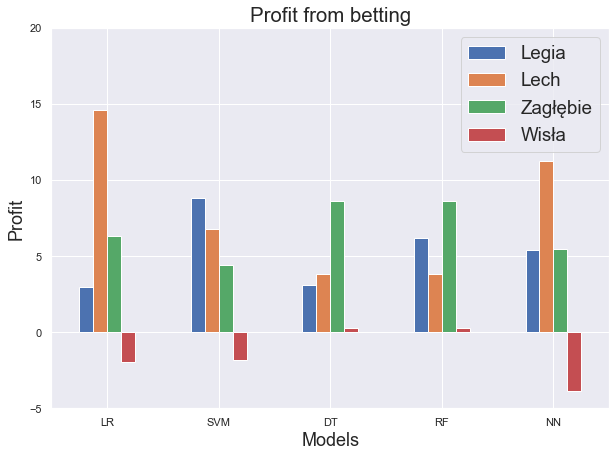

In [203]:
sns.set(rc={'figure.figsize':(10,7)})
betting_profit.plot.bar(rot=0)
sns.set(font_scale = 1.7)
plt.xlabel('Models',fontsize=18)
plt.ylabel('Profit',fontsize=18)
plt.title('Profit from betting')
plt.ylim([-5,20])
plt.legend(loc='best')

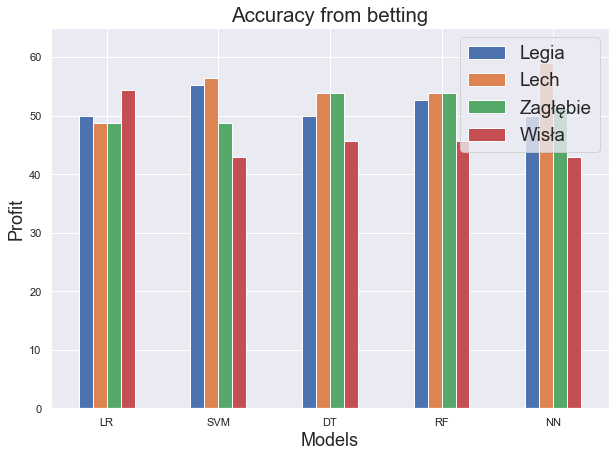

In [205]:
sns.set(rc={'figure.figsize':(10,7)})
betting_accuracy.plot.bar(rot=0)
sns.set(font_scale = 1.7)
plt.xlabel('Models',fontsize=18)
plt.ylabel('Profit',fontsize=18)
plt.title('Accuracy from betting')
plt.ylim([0,65])
plt.legend(loc='best')

In [116]:
test_index

[1108,
 1042,
 941,
 346,
 957,
 81,
 1225,
 1038,
 989,
 236,
 482,
 18,
 90,
 824,
 32,
 986,
 44,
 1180,
 694,
 134,
 416,
 1203,
 1131,
 1234,
 20,
 1202,
 1094,
 845,
 1039,
 1264,
 1194,
 486,
 104,
 389,
 420,
 1088,
 1287,
 610,
 256,
 1238,
 0,
 45,
 1276,
 601,
 1324,
 1290,
 762,
 115,
 1257,
 295,
 612,
 132,
 449,
 1035,
 307,
 304,
 898,
 713,
 353,
 1239,
 759,
 607,
 355,
 888,
 1174,
 917,
 168,
 887,
 157,
 1125,
 573,
 864,
 161,
 618,
 147,
 945,
 172,
 142,
 187,
 72,
 812,
 195,
 495,
 373,
 935,
 699,
 306,
 198,
 1040,
 162,
 688,
 1101,
 722,
 924,
 1284,
 792,
 185,
 998,
 367,
 429,
 1317,
 680,
 2,
 774,
 1240,
 976,
 739,
 928,
 1124,
 850,
 641,
 25,
 568,
 922,
 509,
 440,
 631,
 840,
 948,
 666,
 325,
 141,
 808,
 99,
 1056,
 1224,
 1310,
 1095,
 1199,
 1153,
 1349,
 257,
 320,
 1293,
 708,
 1339,
 405,
 843,
 1105,
 457,
 218,
 191,
 1147,
 183,
 291,
 390,
 1201,
 958,
 695,
 533,
 875,
 500,
 544,
 87,
 1014,
 1256,
 179,
 661,
 109,
 1156,
 347,
 26,

In [110]:
print(len(legia_idx),len(lech_idx),len(lubin_idx),len(wisla_idx))

38 39 39 35


In [95]:
df_fe2.iloc[0]['home_team']

'Wisła Płock'

In [118]:
df_fe2['result_cat'] = df_fe2.result.apply(lambda x: np.where(x == 'A',0,np.where(x=='D',1,2)))

In [119]:
df_fe2

,Unnamed: 0,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,...,attacks_hh_seas,attacks_aa_seas,attacks_diff_seas,attacks_dang_hh_seas,attacks_dang_aa_seas,attacks_dang_diff_seas,winner_h,winner_a,winner_d,result_cat
0,690,17/18,1.0,1.0,2017-07-14,Wisła Płock,Lechia Gdańsk,A,0,2,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,1,0,0
1,691,17/18,1.0,1.0,2017-07-14,Pogoń Szczecin,Wisła Kraków,A,1,2,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,1,0,0
2,692,17/18,1.0,1.0,2017-07-15,Górnik Zabrze,Legia Warszawa,H,3,1,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,1,0,0,2
3,693,17/18,1.0,1.0,2017-07-15,Cracovia,Piast Gliwice,D,1,1,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,0,1,1
4,694,17/18,1.0,1.0,2017-07-16,Lech Poznań,Sandecja Nowy Sącz,D,0,0,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,...,106.833333,92.583333,14.250000,67.666667,58.500000,9.166667,0,1,0,0
1349,2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,...,106.727273,90.500000,16.227273,81.818182,60.666667,21.151515,0,0,1,1
1350,2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,...,92.727273,98.166667,-5.439394,76.727273,70.583333,6.143939,0,0,1,1
1351,2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,...,95.818182,80.181818,15.636364,77.181818,51.636364,25.545455,1,0,0,2


In [122]:
list(df_fe2.columns)

['Unnamed: 0',
 'season',
 'round',
 'ekstraklasa',
 'date',
 'home_team',
 'away_team',
 'result',
 'goals_h',
 'goals_a',
 'odds_avg_h',
 'odds_avg_d',
 'odds_avg_a',
 'ht_match_points',
 'at_match_points',
 'ball_poss_h',
 'ball_poss_a',
 'goal_attempts_h',
 'goal_attempts_a',
 'shots_on_h',
 'shots_on_a',
 'shots_off_h',
 'shots_off_a',
 'corner_kicks_h',
 'corner_kicks_a',
 'offsides_h',
 'offsides_a',
 'goalkeeper_saves_h',
 'goalkeeper_saves_a',
 'fouls_h',
 'fouls_a',
 'attacks_h',
 'attacks_a',
 'attacks_dang_h',
 'attacks_dang_a',
 'ht_rank',
 'ht_ls_rank',
 'ht_days_ls_match',
 'ht_points',
 'ht_l_points',
 'ht_l_wavg_points',
 'ht_goals',
 'ht_l_goals',
 'ht_l_wavg_goals',
 'ht_goals_sf',
 'ht_l_goals_sf',
 'ht_l_wavg_goals_sf',
 'ht_wins',
 'ht_draws',
 'ht_losses',
 'ht_win_streak',
 'ht_loss_streak',
 'ht_draw_streak',
 'at_rank',
 'at_ls_rank',
 'at_days_ls_match',
 'at_points',
 'at_l_points',
 'at_l_wavg_points',
 'at_goals',
 'at_l_goals',
 'at_l_wavg_goals',
 'at_go

## SVM 

In [ ]:
clf = svm.SVC(kernel='linear',C=10)
#getting the best 13 features from RFE
rfe = RFE(estimator = clf, n_features_to_select = 42, step=1)
rfe.fit(X, y)
X_transformed = rfe.transform(X)

np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, test_size = 0.2)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [264]:
#getting column names
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

#column importances for each class
importances_a = pd.DataFrame(np.exp(rfe.estimator_.coef_[0]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

importances_d = pd.DataFrame(np.exp(rfe.estimator_.coef_[1]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

importances_h = pd.DataFrame(np.exp(rfe.estimator_.coef_[2]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

In [138]:
featured_columns = ['odds_avg_h',
'odds_avg_d',
'odds_avg_a',
'ht_days_ls_match',
'ht_l_points',
'ht_l_wavg_points',
'ht_l_wavg_goals',
'ht_l_goals_sf',
'at_l_points',
'at_l_wavg_points',
'at_l_goals',
'at_l_wavg_goals',
'at_loss_streak',
'at_win_streak',
'ht_l_wavg_goals_sf',
'goal_attempts_diff_seas',
'ht_win_streak',
'ht_loss_streak',
'ht_draw_streak',
'at_days_ls_match',
'at_l_goals_sf',
'at_l_wavg_goals_sf',
'goal_attempts_aa_seas',
'at_draw_streak',
'ball_poss_hh_seas',
'goal_attempts_hh_seas',
'at_draws',
'ht_draws',
'shots_on_hh_seas',
'shots_on_aa_seas',
'shots_on_diff_seas',
'shots_off_hh_seas',
'shots_off_aa_seas',
'shots_off_diff_seas',
'corner_kicks_aa_seas',
'goalkeeper_saves_hh_seas',
'offsides_hh_seas',
'fouls_hh_seas',
'fouls_aa_seas']

In [139]:
X[featured_columns]

,odds_avg_h,odds_avg_d,odds_avg_a,ht_days_ls_match,ht_l_points,ht_l_wavg_points,ht_l_wavg_goals,ht_l_goals_sf,at_l_points,at_l_wavg_points,...,shots_on_aa_seas,shots_on_diff_seas,shots_off_hh_seas,shots_off_aa_seas,shots_off_diff_seas,corner_kicks_aa_seas,goalkeeper_saves_hh_seas,offsides_hh_seas,fouls_hh_seas,fouls_aa_seas
0,3.550,3.150,2.100,42,0.000000,0.000000,1.166667,2.000000,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,2.400,3.150,2.950,40,0.000000,0.000000,1.416667,1.333333,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,4.750,3.800,1.660,41,0.000000,0.000000,1.375000,1.333333,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,2.200,3.300,3.150,43,0.000000,0.000000,1.020833,2.000000,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,1.400,4.450,7.700,42,0.000000,0.000000,0.677083,2.000000,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2.185,3.325,3.550,9,1.000000,0.984888,0.665909,1.000000,1.000000,1.376497,...,3.583333,0.833333,7.750000,7.250000,0.500000,4.916667,1.666667,2.083333,16.250000,16.083333
1349,2.355,3.210,3.275,6,0.333333,0.659111,0.332955,0.333333,1.000000,1.188248,...,4.250000,-0.431818,10.181818,7.583333,2.598485,5.000000,3.090909,1.909091,12.636364,11.666667
1350,6.450,4.350,1.525,8,0.666667,0.662889,0.666477,1.333333,1.000000,1.094124,...,6.750000,-2.840909,8.181818,10.666667,-2.484848,7.000000,4.181818,2.363636,13.363636,13.166667
1351,1.330,5.075,11.125,8,2.333333,1.498111,1.166572,0.333333,0.333333,0.713729,...,3.272727,3.636364,8.272727,5.909091,2.363636,3.000000,2.272727,2.454545,14.090909,12.272727


In [140]:
np.random.seed(101)
#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X[featured_columns], y, test_size = 0.2)

#scaling features
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
clf = clf = svm.SVC(kernel='linear',C=10)
scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
np.mean(scores)

0.4620710159700986

In [141]:
clf.fit(X_train,y_train)
svm_pred = clf.predict(X_test)
confusion_matrix(y_test, svm_pred, labels=[0,1,2])

array([[ 21,   2,  56],
       [ 12,   2,  50],
       [ 17,   3, 108]], dtype=int64)

## Random Forest

In [142]:
X_train

array([[0.0011655 , 0.88970588, 0.98990918, ..., 0.3       , 0.48076923,
        0.48559671],
       [0.20454545, 0.10294118, 0.10292634, ..., 0.36296296, 0.62820513,
        0.51111111],
       [0.16142191, 0.06617647, 0.15792129, ..., 0.22222222, 0.55944056,
        0.48888889],
       ...,
       [0.17365967, 0.08823529, 0.13218971, ..., 0.33333333, 0.62307692,
        0.62222222],
       [0.16899767, 0.13970588, 0.13975782, ..., 0.        , 0.        ,
        0.        ],
       [0.17890443, 0.09705882, 0.13975782, ..., 0.        , 0.        ,
        0.        ]])

In [174]:
clf = RandomForestClassifier(random_state=0,ccp_alpha = 0.0071306381810437025,max_depth=6,min_samples_split=5)
#getting the best 13 features from RFE

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, test_size = 0.2)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [284]:
np.random.seed(101)
#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#scaling features
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
np.mean(scores)

0.46674311926605505

In [285]:
clf.fit(X_train,y_train)
rf_pred = clf.predict(X_test)
confusion_matrix(y_test, rf_pred, labels=[0,1,2])

array([[ 17,   0,  62],
       [  8,   0,  56],
       [ 15,   0, 113]], dtype=int64)

In [336]:
comparison2 = pd.DataFrame(index = ['17/18','18/19','19/20','20/21','21/22'],columns=['Ekstraklasa','Premier League'])
comparison2.iloc[0] = [60.37,75.43] 
comparison2.iloc[1] = [64.07,78.07]
comparison2.iloc[2] = [60.00,71.93]
comparison2.iloc[3] = [64.81,66.96]
comparison2.iloc[4] = [67.97,75.73]
comparison2

,Ekstraklasa,Premier League
17/18,60.37,75.43
18/19,64.07,78.07
19/20,60,71.93
20/21,64.81,66.96
21/22,67.97,75.73


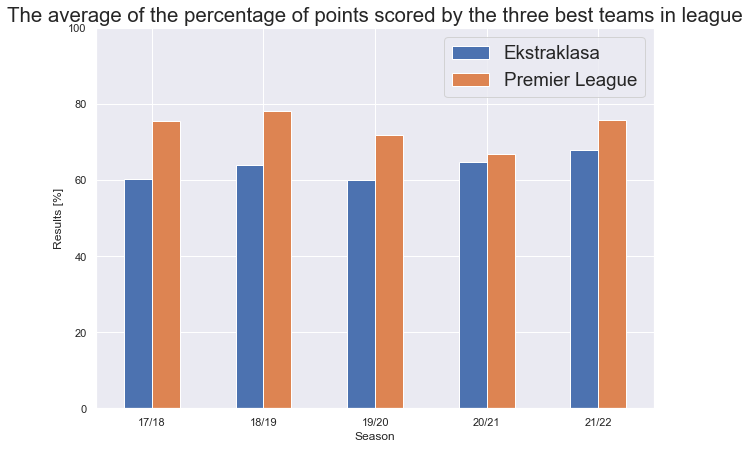

In [339]:
sns.set(rc={'figure.figsize':(10,7)})
comparison2.plot.bar(rot=0)
sns.set(font_scale = 1.7)
plt.xlabel('Season')
plt.ylabel('Results [%]')
plt.title('The average of the percentage of points scored by the three best teams in league')
plt.ylim([0,100])
plt.legend(loc='best')

In [340]:
from platform import python_version
print(python_version())

3.7.1


In [308]:
comparison = pd.DataFrame(index = ['Logistic Regression','SVM','Decision Tree','Random Forest','Neural Network'],columns=['training','test'])
comparison.iloc[0] = [47.94,49.45] 
comparison.iloc[1] = [47.90,49.82]
comparison.iloc[2] = [47.04,47.60]
comparison.iloc[3] = [46.67,47.97]
comparison.iloc[4] = [45.16,46.13]
comparison

,training,test
Logistic Regression,47.94,49.45
SVM,47.9,49.82
Decision Tree,47.04,47.6
Random Forest,46.67,47.97
Neural Network,45.16,46.13


In [334]:
ax

AttributeError: 'NoneType' object has no attribute 'containers'

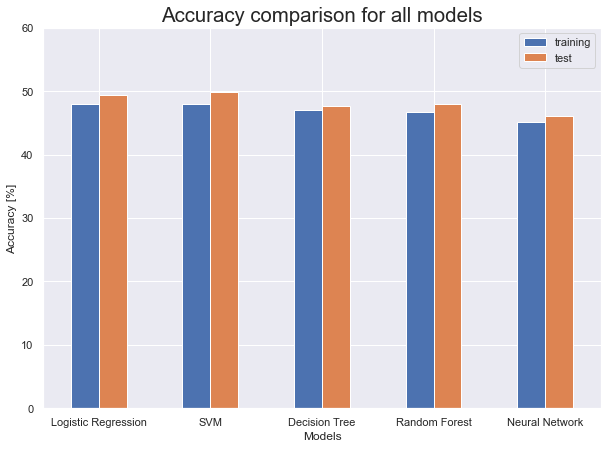

In [335]:
sns.set(rc={'figure.figsize':(10,7)})
comparison.plot.bar(rot=0)
sns.set(font_scale = 1.7)
plt.xlabel('Models')
plt.ylabel('Accuracy [%]')
plt.title('Accuracy comparison for all models')
plt.ylim([0,60])
plt.legend(loc='best')

In [ ]:
comparison.set_index(['report_date', 'shift'])

## Neural Network

In [187]:
clf = MLPClassifier(hidden_layer_sizes=400,learning_rate_init=0.00001,activation='logistic')

np.random.seed(101)
#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#scaling features
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
np.mean(scores)

0.4427030241250424

In [188]:
clf.fit(X_train,y_train)
nn_pred = clf.predict(X_test)
confusion_matrix(y_test, nn_pred, labels=[0,1,2])

array([[  0,   0,  79],
       [  0,   0,  64],
       [  0,   0, 128]], dtype=int64)

In [ ]:
hidden = [2,5,10,20,50,100,150,200,300,400]
activ = ['logistic', 'tanh', 'relu']
rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]
#solve = ['lbfgs', 'sgd', 'adam']
#alpha = [1,0.1,0.01,0.001,0.0001,0.00001,0.000001]

grid = dict(hidden_layer_sizes=hidden,activation=activ,learning_rate_init=rate,solver=solve,alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [447]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [449]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X[featured_columns], y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.479439 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [479]:
a = np.zeros([3,5])
for i in range(30):
    b = np.array( [ list(grid_result.cv_results_['split{}_test_score'.format(i)][[0,3,6,9,12]]),
           list(grid_result.cv_results_['split{}_test_score'.format(i)][[1,4,7,10,13]]),
           list(grid_result.cv_results_['split{}_test_score'.format(i)][[2,5,8,11,14]])])
    a = a+b

In [482]:
a = a/30
aa = pd.DataFrame(a.transpose())
aa[[1,2]]

In [296]:
grid_result.cv_results_

{'mean_fit_time': array([ 0.17964897,  0.16914752,  0.5680851 ,  1.00801377,  0.29816649,
         0.25902669,  0.26241412,  0.71599147,  1.66870372,  1.06665957,
         0.30180733,  0.24061289,  0.65357537,  1.22226861,  0.75605936,
         0.24946954,  0.19958708,  0.77791858,  1.42644734,  1.87825308,
         0.29852839,  0.33193922,  1.01652894,  1.60235646,  2.48143008,
         0.54733515,  0.43024359,  1.42555215,  3.82846651,  2.63870609,
         0.88404839,  0.58354297,  2.83772194,  9.16350889,  5.35692191,
         2.7176152 ,  1.56266725,  4.13953366, 13.09730682,  7.44029107,
         0.30340993,  0.27654483,  0.73107493,  1.72178934,  1.33316822,
         0.27329893,  0.30400586,  0.66190279,  1.7807445 ,  1.81238747,
         0.22410367,  0.23011429,  0.45421867,  1.85945547,  2.06192265,
         0.27794595,  0.27525017,  0.48327396,  1.55615265,  2.37407141,
         0.33812869,  0.39668038,  0.61692345,  2.19000916,  3.0939187 ,
         0.48197391,  0.46309991, 

In [498]:
aa = pd.DataFrame(a.transpose())
aa[[1,2]]

,1,2
0,0.470574,0.0
1,0.471066,0.0
2,0.474020,0.0
3,0.479439,0.0
4,0.472534,0.0


<AxesSubplot:>

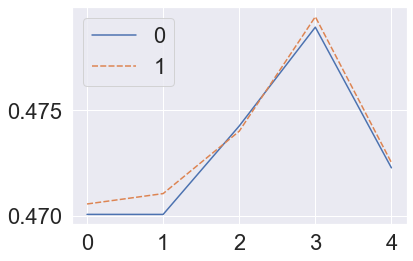

In [499]:
sns.lineplot(data = aa[[0,1]])

In [485]:
a

array([[0.4700817 , 0.47007988, 0.47426652, 0.47894517, 0.47228577],
       [0.47057371, 0.47106572, 0.47401961, 0.479439  , 0.4725345 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [483]:
a[0]

array([0.4700817 , 0.47007988, 0.47426652, 0.47894517, 0.47228577])

In [476]:
np.zeros([3,5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [478]:
np.array( [ list(grid_result.cv_results_['split{}_test_score'.format(0)][[0,3,6,9,12]]),
           list(grid_result.cv_results_['split{}_test_score'.format(0)][[1,4,7,10,13]]),
           list(grid_result.cv_results_['split{}_test_score'.format(0)][[2,5,8,11,14]])])
           

array([[0.44852941, 0.44852941, 0.45588235, 0.44852941, 0.45588235],
       [0.44852941, 0.44852941, 0.45588235, 0.44852941, 0.45588235],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [471]:
aa = a/30
aa.shape

(15,)

In [465]:
grid_result.

{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['l2'],
 'C': [100, 10, 1.0, 0.1, 0.01]}

In [428]:
#tuning logistic regression
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'fit_intercept': (True, False), 'solver' : ('newton-cg', 'sag', 'saga', 'lbfgs'), 'class_weight' : (None, 'balanced'), 'penalty': ('l1','l2')}

gs = GridSearchCV(clf, parameters, scoring='accuracy', cv=3)
start = time.time()

#printing best fits and time elapsed
gs.fit(X_train,y_train)
print(gs.best_score_, gs.best_params_,  time.time() - start)

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this 

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this 

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this 

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this 

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only

C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\kubus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

0.46580742792654145 {'C': 1, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'} 80.32213950157166


## SVM

In [87]:
#getting the best 13 features from RFE
rfe = RFE(estimator = clf, n_features_to_select = 40, step=1)
rfe.fit(X, y)
X_transformed = rfe.transform(X)

np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, test_size = 0.2)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [88]:
#getting column names
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

#column importances for each class
importances_a = pd.DataFrame(np.exp(rfe.estimator_.coef_[0]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

importances_d = pd.DataFrame(np.exp(rfe.estimator_.coef_[1]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

importances_h = pd.DataFrame(np.exp(rfe.estimator_.coef_[2]),
                            index = featured_columns,
                            columns=['coef']).sort_values('coef', ascending = False)

importances_h

,coef
at_l_wavg_goals_sf,1.024465
odds_avg_h,1.023583
goal_attempts_diff_seas,1.012836
shots_off_aa_seas,1.012369
shots_on_aa_seas,1.011487
at_l_points,1.007558
ht_l_wavg_goals_sf,1.007331
odds_avg_d,1.006596
ht_l_points,1.005905
offsides_hh_seas,1.003902


In [89]:
X[featured_columns]

,odds_avg_h,odds_avg_d,odds_avg_a,ht_days_ls_match,ht_l_points,ht_l_wavg_points,ht_l_goals,ht_l_wavg_goals,ht_l_goals_sf,ht_l_wavg_goals_sf,...,shots_on_aa_seas,shots_on_diff_seas,shots_off_hh_seas,shots_off_aa_seas,shots_off_diff_seas,corner_kicks_aa_seas,offsides_hh_seas,goalkeeper_saves_hh_seas,fouls_hh_seas,fouls_aa_seas
0,3.550,3.150,2.100,42,0.000000,0.000000,2.333333,1.166667,2.000000,1.000000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,2.400,3.150,2.950,40,0.000000,0.000000,1.666667,1.416667,1.333333,1.166667,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,4.750,3.800,1.660,41,0.000000,0.000000,1.333333,1.375000,1.333333,1.250000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,2.200,3.300,3.150,43,0.000000,0.000000,0.666667,1.020833,2.000000,1.625000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,1.400,4.450,7.700,42,0.000000,0.000000,0.333333,0.677083,2.000000,1.812500,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2.185,3.325,3.550,9,1.000000,0.984888,0.666667,0.665909,1.000000,1.154714,...,3.583333,0.833333,7.750000,7.250000,0.500000,4.916667,2.083333,1.666667,16.250000,16.083333
1349,2.355,3.210,3.275,6,0.333333,0.659111,0.000000,0.332955,0.333333,0.744024,...,4.250000,-0.431818,10.181818,7.583333,2.598485,5.000000,1.909091,3.090909,12.636364,11.666667
1350,6.450,4.350,1.525,8,0.666667,0.662889,1.000000,0.666477,1.333333,1.038679,...,6.750000,-2.840909,8.181818,10.666667,-2.484848,7.000000,2.363636,4.181818,13.363636,13.166667
1351,1.330,5.075,11.125,8,2.333333,1.498111,1.666667,1.166572,0.333333,0.686006,...,3.272727,3.636364,8.272727,5.909091,2.363636,3.000000,2.454545,2.272727,14.090909,12.272727


In [90]:
np.random.seed(101)
#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X[featured_columns], y, test_size = 0.2)

#scaling features
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
clf = svm.SVC(kernel='linear') #LogisticRegression(max_iter = 3000, multi_class = 'multinomial')
scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
np.mean(scores)

0.46487427794767244

In [94]:
start = time.time()
for i in range(100000):
    pass
end = time.time()
tt = end-start
print(tt)

0.006021261215209961


In [98]:
start = time.time()
kernels = ['linear'] #['linear', 'rbf']
#gammas = [0.1,1,10,100]
c_values = [0.1,1,10,100,1000]

grid = dict(kernel=kernels,C=c_values) #,gamma=gammas
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X[featured_columns], y)
# summarize results
end = time.time()
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tt = end-start
print('time: ',tt)

Best: 0.478976 using {'C': 10, 'kernel': 'linear'}
time:  6351.4442682266235


In [99]:
start = time.time()
kernels = ['rbf']
gammas = [0.0001,0.01,0.1,1]
c_values = [0.1,1,10,100,1000]

grid2 = dict(kernel=kernels,C=c_values,gamma=gammas) #,gamma=gammas
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search2 = GridSearchCV(estimator=clf, param_grid=grid2, n_jobs=-1, cv=cv2, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(X[featured_columns], y)
# summarize results
end = time.time()
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
tt = end-start
print('time: ',tt)

Best: 0.478976 using {'C': 10, 'kernel': 'linear'}
time:  6269.707812309265


In [103]:
grid_result2.cv_results_

{'mean_fit_time': array([1.02375982e+00, 1.78222442e-01, 7.69287574e+00, 1.80017304e-01,
        5.08068803e+01, 2.21007752e-01, 3.96076435e+02, 2.73866010e-01,
        1.87186498e+03, 6.53650689e-01]),
 'std_fit_time': array([3.75015699e-01, 7.28859989e-03, 2.40942134e+00, 4.57511201e-03,
        1.28549451e+01, 1.76343754e-02, 5.21930260e+01, 7.68883518e-03,
        4.83526883e+02, 4.76204397e-02]),
 'mean_score_time': array([0.0105716 , 0.01446106, 0.01057174, 0.01416185, 0.01176863,
        0.01735349, 0.0138628 , 0.01745307, 0.01127   , 0.01725373]),
 'std_score_time': array([0.00048857, 0.00049899, 0.00048868, 0.0005985 , 0.00124561,
        0.00149293, 0.00206592, 0.0004987 , 0.00173052, 0.00045731]),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['line

In [105]:
for i in range(10):
    print(grid_result2.cv_results_['params'][i],':',np.mean(grid_result2.cv_results_['split{}_test_score'.format(i)]))

{'C': 0.1, 'kernel': 'linear'} : 0.44117647058823534
{'C': 0.1, 'kernel': 'rbf'} : 0.450735294117647
{'C': 1, 'kernel': 'linear'} : 0.4529411764705883
{'C': 1, 'kernel': 'rbf'} : 0.4881481481481481
{'C': 10, 'kernel': 'linear'} : 0.47703703703703704
{'C': 10, 'kernel': 'rbf'} : 0.4533333333333333
{'C': 100, 'kernel': 'linear'} : 0.4525925925925926
{'C': 100, 'kernel': 'rbf'} : 0.45851851851851844
{'C': 1000, 'kernel': 'linear'} : 0.47555555555555556
{'C': 1000, 'kernel': 'rbf'} : 0.4837037037037037


In [109]:
a = np.zeros([2,5])
for i in range(10):
    b = np.array( [ list(grid_result2.cv_results_['split{}_test_score'.format(i)][[0,2,4,6,8]]),
           list(grid_result2.cv_results_['split{}_test_score'.format(i)][[1,3,5,7,9]]),
           ])
    a = a+b

In [265]:
print('hello')

hello


In [110]:
a = a/10
aa = pd.DataFrame(a.transpose())
aa

,0,1
0,0.477484,0.447173
1,0.477511,0.453840
2,0.478976,0.447919
3,0.474570,0.464194
4,0.467887,0.444188


In [ ]:
start = time.time()
kernels = ['linear', 'rbf']
gammas = [0.1,1,10]
c_values = [0.1,1,10,100,1000]

grid2 = dict(kernel=kernels,C=c_values) #,gamma=gammas
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search2 = GridSearchCV(estimator=clf, param_grid=grid2, n_jobs=-1, cv=cv2, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(X[featured_columns], y)
# summarize results
end = time.time()
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
tt = end-start
print('time: ',tt)

In [ ]:
svm.SVC()

In [ ]:
print{'lala'}

In [295]:
df_dum.columns

Index(['winner', 'odds_avg_h', 'odds_avg_d', 'odds_avg_a', 'ht_rank',
       'ht_ls_rank', 'ht_days_ls_match', 'ht_points', 'ht_l_points',
       'ht_l_wavg_points', 'ht_goals', 'ht_l_goals', 'ht_l_wavg_goals',
       'ht_goals_sf', 'ht_l_goals_sf', 'ht_l_wavg_goals_sf', 'ht_wins',
       'ht_draws', 'ht_losses', 'ht_win_streak', 'ht_loss_streak',
       'ht_draw_streak', 'at_rank', 'at_ls_rank', 'at_days_ls_match',
       'at_points', 'at_l_points', 'at_l_wavg_points', 'at_goals',
       'at_l_goals', 'at_l_wavg_goals', 'at_goals_sf', 'at_l_goals_sf',
       'at_l_wavg_goals_sf', 'at_wins', 'at_draws', 'at_losses',
       'at_win_streak', 'at_loss_streak', 'at_draw_streak',
       'ball_poss_hh_seas', 'ball_poss_aa_seas', 'ball_poss_diff_seas',
       'goal_attempts_hh_seas', 'goal_attempts_aa_seas',
       'goal_attempts_diff_seas', 'shots_on_hh_seas', 'shots_on_aa_seas',
       'shots_on_diff_seas', 'shots_off_hh_seas', 'shots_off_aa_seas',
       'shots_off_diff_seas', 'corner_kick

In [296]:
#Creating loop to test which set of features is the best one for Logistic Regression
np.random.seed(10)
acc_results = []
n_features = []

#best classifier on training data
clf = LogisticRegression(max_iter = 3000, multi_class = 'multinomial')

X = df_dum.loc[:,['odds_avg_h', 'odds_avg_d', 'odds_avg_a','ht_rank','at_rank','ht_l_points','at_l_points','at_l_wavg_points','at_l_wavg_goals','at_l_wavg_goals_sf','at_win_streak']]
y = df_dum.winner.values

for i in range(2,11):
    rfe = RFE(estimator = clf, n_features_to_select = i, step=1)
    rfe.fit(X, y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y, test_size = 0.2)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

 Clf result : 0.470, +- 0.022 N_features : 2
 Clf result : 0.470, +- 0.021 N_features : 3
 Clf result : 0.468, +- 0.027 N_features : 4
 Clf result : 0.466, +- 0.023 N_features : 5
 Clf result : 0.469, +- 0.016 N_features : 6
 Clf result : 0.469, +- 0.017 N_features : 7
 Clf result : 0.465, +- 0.026 N_features : 8
 Clf result : 0.467, +- 0.019 N_features : 9
 Clf result : 0.466, +- 0.021 N_features : 10


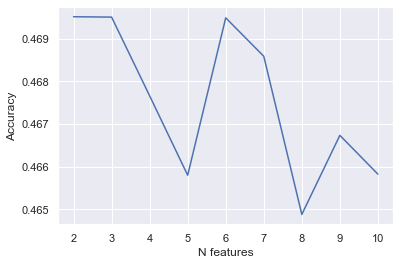

In [297]:
plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [287]:
#Creating loop to test which set of features is the best one for Logistic Regression

acc_results = []
n_features = []

#best classifier on training data
clf = RandomForestClassifier() #LogisticRegression(max_iter = 1000, multi_class = 'multinomial')

for i in range(2, 70):
    rfe = RFE(estimator = clf, n_features_to_select = i, step=1)
    rfe.fit(X, y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y, test_size = 0.2)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

 Clf result : 0.396, +- 0.046 N_features : 2
 Clf result : 0.403, +- 0.028 N_features : 3
 Clf result : 0.385, +- 0.034 N_features : 4
 Clf result : 0.403, +- 0.019 N_features : 5
 Clf result : 0.400, +- 0.029 N_features : 6
 Clf result : 0.407, +- 0.019 N_features : 7
 Clf result : 0.424, +- 0.029 N_features : 8
 Clf result : 0.415, +- 0.027 N_features : 9
 Clf result : 0.409, +- 0.046 N_features : 10
 Clf result : 0.431, +- 0.040 N_features : 11
 Clf result : 0.425, +- 0.045 N_features : 12
 Clf result : 0.439, +- 0.033 N_features : 13
 Clf result : 0.416, +- 0.039 N_features : 14
 Clf result : 0.427, +- 0.030 N_features : 15
 Clf result : 0.430, +- 0.046 N_features : 16
 Clf result : 0.426, +- 0.043 N_features : 17
 Clf result : 0.431, +- 0.047 N_features : 18
 Clf result : 0.420, +- 0.029 N_features : 19
 Clf result : 0.429, +- 0.039 N_features : 20
 Clf result : 0.412, +- 0.047 N_features : 21
 Clf result : 0.433, +- 0.033 N_features : 22
 Clf result : 0.431, +- 0.025 N_features :

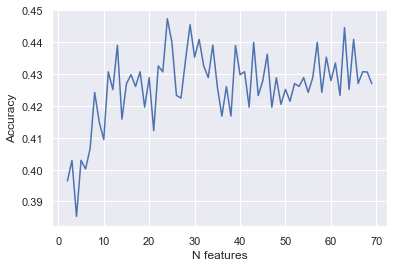

In [288]:
plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

## Decision Tree

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_temp,y, test_size = 0.2)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [151]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train,y_train)
#tree.plot_tree(tree_clf)


In [152]:
# pruning
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

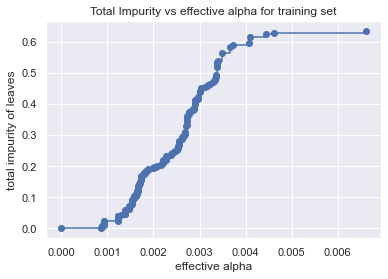

In [153]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [154]:
clfs = []
for ccp_alpha in ccp_alphas[:-1]:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [155]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

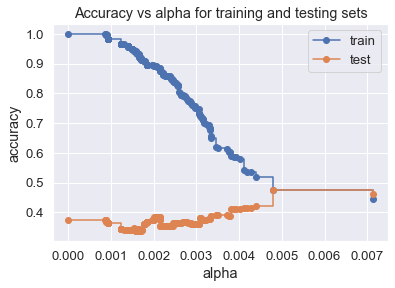

In [127]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [157]:
test_scores = list(test_scores)
ccp_alphas = list(ccp_alphas)
test_scores.reverse()
ccp_alphas.reverse()

In [129]:
alpha_idx = test_scores.index(max(test_scores))
alpha = ccp_alphas[alpha_idx]
print('The best Alpha:',alpha)

The best Alpha: 0.0071306381810437025


In [159]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.0071306381810437025)
clf.fit(X_train, y_train)
#tree.plot_tree(clf)

DecisionTreeClassifier(ccp_alpha=0.0071306381810437025, random_state=0)

In [136]:
ccp_alphas

[0.013248182025740518,
 0.0071306381810437025,
 0.004789697995261096,
 0.004397046004640713,
 0.0042838623745894075,
 0.004190472189547974,
 0.004113346531830375,
 0.004013811235166316,
 0.0039321122500420086,
 0.0038745912128536966,
 0.003809559097641732,
 0.003783381317604039,
 0.0037728768329782624,
 0.003718968063748684,
 0.003512014787430684,
 0.0034628828461846567,
 0.0033505909117521587,
 0.0033416509911852977,
 0.0033257715790063324,
 0.003305843878856818,
 0.0033000717098266423,
 0.003286644854547432,
 0.003234750462107208,
 0.0031650454016442925,
 0.00316331359889987,
 0.0031604866920320503,
 0.0031576369195914344,
 0.0031367277208312334,
 0.0031192236598890947,
 0.0031011183812973443,
 0.0030895167678901504,
 0.0030827685356335996,
 0.0030654439416151445,
 0.003056169128561432,
 0.0030499979220985733,
 0.00296277507184586,
 0.0029541007359861326,
 0.002952351612240706,
 0.002888840781631905,
 0.0028695888215296717,
 0.002867691661054512,
 0.0028507003429893204,
 0.0028379917

In [132]:
from sklearn.metrics import confusion_matrix

In [160]:
dt_pred = clf.predict(X_test)
print('Confusion matrix:\n',confusion_matrix(y_test,clf.predict(X_test)))
print('Number of nodes:',clf.tree_.node_count)
print('Accuracy for Decision Tree with best Alpha:',clf.score(X_test,y_test))

Confusion matrix:
 [[ 15   0  64]
 [  8   0  56]
 [ 14   0 114]]
Number of nodes: 3
Accuracy for Decision Tree with best Alpha: 0.47601476014760147


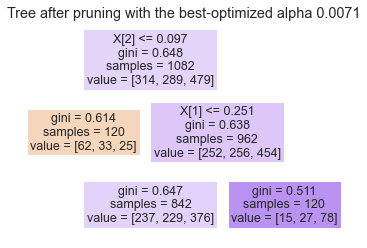

In [162]:
tree.plot_tree(clf,filled=True)
plt.title('Tree after pruning with the best-optimized alpha {}'.format(round(alpha,ndigits=4)))
plt.show()

In [152]:
clf.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(ccp_alpha=0.0071306381810437025, random_state=0)>

In [148]:
X

,Unnamed: 0,odds_avg_h,odds_avg_d,odds_avg_a,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,...,fouls_hh_seas,fouls_aa_seas,fouls_diff_seas,attacks_hh_seas,attacks_aa_seas,attacks_diff_seas,attacks_dang_hh_seas,attacks_dang_aa_seas,attacks_dang_diff_seas,rank_diff
0,690,3.550,3.150,2.100,1,7,42,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,12.0
1,691,2.400,3.150,2.950,2,11,40,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,7.0
2,692,4.750,3.800,1.660,5,-1,41,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,7.0
3,693,2.200,3.300,3.150,6,13,43,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,7.0
4,694,1.400,4.450,7.700,8,3,42,0,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,2038,2.185,3.325,3.550,11,13,9,30,1.000000,0.984888,...,16.250000,16.083333,0.166667,106.833333,92.583333,14.250000,67.666667,58.500000,9.166667,-3.0
1349,2039,2.355,3.210,3.275,15,8,6,26,0.333333,0.659111,...,12.636364,11.666667,0.969697,106.727273,90.500000,16.227273,81.818182,60.666667,21.151515,-10.0
1350,2040,6.450,4.350,1.525,17,14,8,23,0.666667,0.662889,...,13.363636,13.166667,0.196970,92.727273,98.166667,-5.439394,76.727273,70.583333,6.143939,-14.0
1351,2041,1.330,5.075,11.125,3,2,8,48,2.333333,1.498111,...,14.090909,12.272727,1.818182,95.818182,80.181818,15.636364,77.181818,51.636364,25.545455,6.0


In [195]:
np.random.seed(101)
#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#scaling features
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
clf = tree.DecisionTreeClassifier(random_state=101, ccp_alpha=ccp_alpha) #LogisticRegression(max_iter = 3000, multi_class = 'multinomial')
scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
np.mean(scores)

0.4704298335032281

In [153]:
ccp_alpha

0.0071306381810437025

In [166]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
res1 = clf.score(X_test,y_test)
print('Accuracy for Random Forest without pruning:',res1)
clf = RandomForestClassifier(random_state=0,ccp_alpha = alpha)
clf.fit(X_train, y_train)
res2 = clf.score(X_test,y_test)
print('Accuracy for Random Forest with pruning:',res2)

Accuracy for Random Forest without pruning: 0.4612546125461255
Accuracy for Random Forest with pruning: 0.46494464944649444


In [167]:
start = time.time()

max_de = [1,2,3,4,5,6,7,8,15,30]
min_spl = [2,5,10,20,50,100]

grid2 = dict(max_depth = max_de,min_samples_split=min_spl) #,gamma=gammas
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search2 = GridSearchCV(estimator=clf, param_grid=grid2, n_jobs=-1, cv=cv2, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(X[featured_columns], y)
# summarize results
end = time.time()
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
tt = end-start
print('time: ',tt)

Best: 0.465626 using {'max_depth': 6, 'min_samples_split': 5}
time:  97.44572353363037


In [173]:
grid_search2.cv_results_

{'mean_fit_time': array([0.33181255, 0.31964471, 0.3048835 , 0.29660687, 0.29580836,
        0.29381332, 0.33221023, 0.40232275, 0.41359034, 0.41449058,
        0.36921179, 0.3339854 , 0.37220423, 0.38696434, 0.4585722 ,
        0.53776062, 0.51581933, 0.50425019, 0.54384394, 0.51950936,
        0.51811285, 0.50634513, 0.50225642, 0.55840528, 0.57007408,
        0.56119819, 0.60867114, 0.64686856, 0.60726948, 0.5320755 ,
        0.61056559, 0.60478308, 0.63948879, 0.5964031 , 0.70042548,
        0.57286663, 0.73842371, 0.72685535, 0.72441537, 0.63908956,
        0.60129054, 0.5719692 , 0.69912906, 0.69454143, 0.76864316,
        0.86558433, 0.7970669 , 0.66072972, 0.93180676, 0.88872209,
        0.83656695, 0.78011866, 0.68676319, 0.69045184, 1.06325324,
        0.92462635, 0.91754522, 0.79707525, 0.69125075, 0.61126375]),
 'std_fit_time': array([0.02452279, 0.02386598, 0.01214178, 0.0076754 , 0.00770164,
        0.00351754, 0.00563224, 0.02214545, 0.00689783, 0.00795577,
        0.027

In [174]:
a = np.zeros([10,6])
for i in range(10):
    b = np.array( [ list(grid_result2.cv_results_['split{}_test_score'.format(i)][[0,1,2,3,4,5]]),
           list(grid_result2.cv_results_['split{}_test_score'.format(i)][[6,7,8,9,10,11]]),
            list(grid_result2.cv_results_['split{}_test_score'.format(i)][[12,13,14,15,16,17]]),
            list(grid_result2.cv_results_['split{}_test_score'.format(i)][[18,19,20,21,22,23]]),
            list(grid_result2.cv_results_['split{}_test_score'.format(i)][[24,25,26,27,28,29]]),
            list(grid_result2.cv_results_['split{}_test_score'.format(i)][[30,31,32,33,34,35]]),
            list(grid_result2.cv_results_['split{}_test_score'.format(i)][[36,37,38,39,40,41]]),
            list(grid_result2.cv_results_['split{}_test_score'.format(i)][[42,43,44,45,46,47]]),
            list(grid_result2.cv_results_['split{}_test_score'.format(i)][[48,49,50,51,52,53]]),
            list(grid_result2.cv_results_['split{}_test_score'.format(i)][[54,55,56,57,58,59]]),
           ])
    a = a+b

a = a/10
aa = pd.DataFrame(a.transpose())
aa

,0,1,2,3,4,5,6,7,8,9
0,0.448649,0.448649,0.457500,0.464891,0.462685,0.464156,0.464145,0.461944,0.461939,0.464156
1,0.448649,0.448649,0.458981,0.464139,0.458981,0.465626,0.464139,0.464145,0.461182,0.463415
2,0.448649,0.447908,0.456765,0.462669,0.458987,0.463404,0.461187,0.461198,0.456024,0.456029
3,0.448649,0.447908,0.456765,0.464145,0.457495,0.462674,0.460463,0.461215,0.458246,0.457511
4,0.448649,0.450120,0.456770,0.461934,0.461939,0.459706,0.459700,0.456759,0.461939,0.459717
5,0.448649,0.448638,0.456765,0.460452,0.461923,0.462669,0.463404,0.461187,0.461187,0.461187


In [189]:
aa_new = aa.rename(columns={0: '1',1: '2',2: '3',3: '4',4: '5',5: '6',6: '7',7: '8',8: '15',9: '30'}, index={0: '2',1: '5',2: '10',3: '20',4: '50',5: '100'})
aa_new

,1,2,3,4,5,6,7,8,15,30
2,0.448649,0.448649,0.457500,0.464891,0.462685,0.464156,0.464145,0.461944,0.461939,0.464156
5,0.448649,0.448649,0.458981,0.464139,0.458981,0.465626,0.464139,0.464145,0.461182,0.463415
10,0.448649,0.447908,0.456765,0.462669,0.458987,0.463404,0.461187,0.461198,0.456024,0.456029
20,0.448649,0.447908,0.456765,0.464145,0.457495,0.462674,0.460463,0.461215,0.458246,0.457511
50,0.448649,0.450120,0.456770,0.461934,0.461939,0.459706,0.459700,0.456759,0.461939,0.459717
100,0.448649,0.448638,0.456765,0.460452,0.461923,0.462669,0.463404,0.461187,0.461187,0.461187


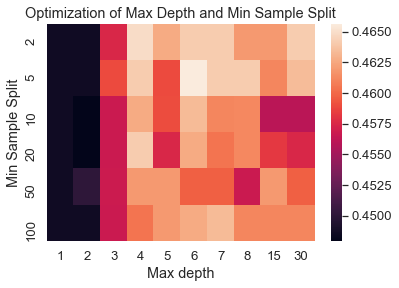

In [191]:
sns.heatmap(aa_new)
plt.xlabel('Max depth')
plt.ylabel('Min Sample Split')
plt.title('Optimization of Max Depth and Min Sample Split')
plt.show()

In [246]:
np.random.seed(101)
#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X[featured_columns], y, test_size = 0.2)

#scaling features
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
clf = RandomForestClassifier(random_state=0,ccp_alpha = alpha,max_depth=6,min_samples_split=5) #LogisticRegression(max_iter = 3000, multi_class = 'multinomial')
scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=10)
clf.fit(X_train,y_train)
np.mean(scores)

0.4648827726809378

In [211]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

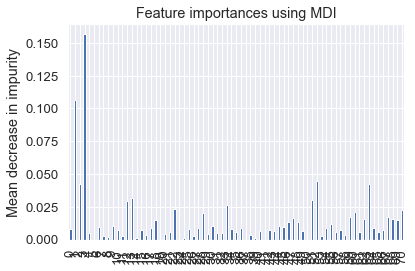

In [212]:
forest_importances = pd.Series(importances)

In [208]:
X.columns

Index(['Unnamed: 0', 'odds_avg_h', 'odds_avg_d', 'odds_avg_a', 'ht_rank',
       'ht_ls_rank', 'ht_days_ls_match', 'ht_points', 'ht_l_points',
       'ht_l_wavg_points', 'ht_goals', 'ht_l_goals', 'ht_l_wavg_goals',
       'ht_goals_sf', 'ht_l_goals_sf', 'ht_l_wavg_goals_sf', 'ht_wins',
       'ht_draws', 'ht_losses', 'ht_win_streak', 'ht_loss_streak',
       'ht_draw_streak', 'at_rank', 'at_ls_rank', 'at_days_ls_match',
       'at_points', 'at_l_points', 'at_l_wavg_points', 'at_goals',
       'at_l_goals', 'at_l_wavg_goals', 'at_goals_sf', 'at_l_goals_sf',
       'at_l_wavg_goals_sf', 'at_wins', 'at_draws', 'at_losses',
       'at_win_streak', 'at_loss_streak', 'at_draw_streak',
       'ball_poss_hh_seas', 'ball_poss_aa_seas', 'ball_poss_diff_seas',
       'goal_attempts_hh_seas', 'goal_attempts_aa_seas',
       'goal_attempts_diff_seas', 'shots_on_hh_seas', 'shots_on_aa_seas',
       'shots_on_diff_seas', 'shots_off_hh_seas', 'shots_off_aa_seas',
       'shots_off_diff_seas', 'corner_

In [224]:
forest_importances = pd.DataFrame(forest_importances)
forest_importances['new_idx'] = list(X.columns)
forest_importances = forest_importances.set_index('new_idx')
forest_importances = forest_importances.sort_values(ascending= False, by= 0)
forest_importances

,0
new_idx,
odds_avg_a,0.156705
odds_avg_h,0.106112
corner_kicks_hh_seas,0.044381
fouls_diff_seas,0.042524
odds_avg_d,0.042439
...,...
at_win_streak,0.000000
ball_poss_aa_seas,0.000000
ht_win_streak,0.000000


In [282]:
list(forest_importances[:22].index)

['odds_avg_a',
 'odds_avg_h',
 'corner_kicks_hh_seas',
 'fouls_diff_seas',
 'odds_avg_d',
 'ht_goals_sf',
 'shots_off_diff_seas',
 'ht_l_wavg_goals',
 'at_l_wavg_goals_sf',
 'at_rank',
 'rank_diff',
 'goalkeeper_saves_diff_seas',
 'at_goals',
 'goalkeeper_saves_aa_seas',
 'attacks_dang_hh_seas',
 'shots_on_aa_seas',
 'fouls_aa_seas',
 'attacks_dang_aa_seas',
 'attacks_dang_diff_seas',
 'ht_losses',
 'shots_on_diff_seas',
 'shots_on_hh_seas']

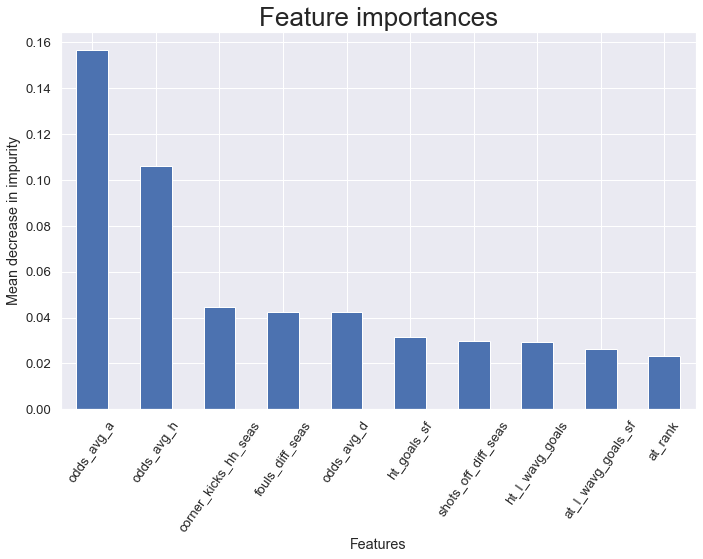

In [288]:
fig, ax = plt.subplots(figsize=(10,8))
forest_importances.iloc[0:10].plot.bar(ax=ax,rot=55)
ax.set_title("Feature importances",fontsize = 26)
ax.set_ylabel("Mean decrease in impurity")
plt.xlabel('Features')
plt.legend('off')
ax.get_legend().remove()
fig.tight_layout()

## FEATURE ENGINEERING EDA

In [47]:
num_cols = df.dtypes[df.dtypes != 'object'].index.tolist()

cols_to_drop = ['season', 'round','ekstraklasa','date', 'home_team', 'away_team', 'goals_h', 'goals_a',
                'ht_match_points', 'at_match_points','ls_winner']

corr_cols = list(set(num_cols) - set(cols_to_drop))

df_fe['winner_h'] = np.where(df_fe.result == 'H', 1, 0)
df_fe['winner_a'] = np.where(df_fe.result == 'A', 1, 0)
df_fe['winner_d'] = np.where(df_fe.result == 'D', 1, 0)

In [51]:
df_fe

,season,round,ekstraklasa,date,home_team,away_team,result,goals_h,goals_a,odds_avg_h,...,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner,winner_h,winner_a,winner_d
690,17/18,1.0,1.0,2017-07-14,Wisła Płock,Lechia Gdańsk,A,0,2,3.550,...,0,0,0,0,0,0,A,0,1,0
691,17/18,1.0,1.0,2017-07-14,Pogoń Szczecin,Wisła Kraków,A,1,2,2.400,...,0,0,0,0,0,0,A,0,1,0
692,17/18,1.0,1.0,2017-07-15,Górnik Zabrze,Legia Warszawa,H,3,1,4.750,...,0,0,0,0,0,0,-1,1,0,0
693,17/18,1.0,1.0,2017-07-15,Cracovia,Piast Gliwice,D,1,1,2.200,...,0,0,0,0,0,0,A,0,0,1
694,17/18,1.0,1.0,2017-07-16,Lech Poznań,Sandecja Nowy Sącz,D,0,0,1.400,...,0,0,0,0,0,0,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,21/22,25.0,1.0,2022-03-13,Jagiellonia Białystok,Wisła Płock,A,0,1,2.185,...,10,3,11,1,0,0,A,0,1,0
2039,21/22,25.0,1.0,2022-03-13,Śląsk Wrocław,Radomiak Radom,D,0,0,2.355,...,10,9,5,0,1,0,D,0,0,1
2040,21/22,25.0,1.0,2022-03-13,Wisła Kraków,Lech Poznań,D,1,1,6.450,...,14,6,4,0,1,0,A,0,0,1
2041,21/22,25.0,1.0,2022-03-14,Raków Częstochowa,Stal Mielec,H,2,1,1.330,...,8,8,8,0,0,1,H,1,0,0


In [48]:
df_fe[corr_cols + ['winner_h']].corr()['winner_h'].sort_values(ascending = False).reset_index()

,index,winner_h
0,winner_h,1.000000
1,odds_avg_a,0.202249
2,odds_avg_d,0.123957
3,at_rank,0.089149
4,at_l_goals_sf,0.082332
5,ht_l_wavg_goals,0.065214
6,at_draw_streak,0.060711
7,at_l_wavg_goals_sf,0.052352
8,ht_l_goals,0.052124
9,ht_l_wavg_points,0.050867


In [49]:
df_fe[corr_cols + ['winner_a']].corr()['winner_a'].sort_values(ascending = False).reset_index()

,index,winner_a
0,winner_a,1.000000
1,odds_avg_h,0.170411
2,at_l_goals,0.061000
3,ht_draw_streak,0.060468
4,at_days_ls_match,0.059271
5,at_wins,0.058486
6,ht_rank,0.057908
7,at_points,0.052745
8,at_l_wavg_goals,0.049922
9,at_goals,0.042309


In [50]:
df_fe[corr_cols + ['winner_d']].corr()['winner_d'].sort_values(ascending = False).reset_index()

,index,winner_d
0,winner_d,1.000000
1,ht_days_ls_match,0.063920
2,odds_avg_h,0.045073
3,ht_ls_rank,0.036899
4,ht_l_wavg_goals_sf,0.024908
5,at_l_points,0.022226
6,ht_l_goals_sf,0.020132
7,at_days_ls_match,0.016048
8,ht_rank,0.012824
9,at_ls_rank,0.011435
